In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,r2_score,mean_absolute_error,mean_absolute_error
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='viridis')

# Importing the data and Performing EDA

In [46]:
df = pd.read_csv(r"C:\Users\priya\Downloads\KNN\Zoo.csv",index_col=0)
print(df.iloc[:,:-1])
# df['type'].values

             hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
animal name                                                                     
aardvark        1         0     0     1         0        0         1        1   
antelope        1         0     0     1         0        0         0        1   
bass            0         0     1     0         0        1         1        1   
bear            1         0     0     1         0        0         1        1   
boar            1         0     0     1         0        0         1        1   
...           ...       ...   ...   ...       ...      ...       ...      ...   
wallaby         1         0     0     1         0        0         0        1   
wasp            1         0     1     0         1        0         0        0   
wolf            1         0     0     1         0        0         1        1   
worm            0         0     1     0         0        0         0        0   
wren            0         1 

In [3]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [6]:
df.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

In [7]:
#to check the relationship between the numerical columns 
sns.pairplot(df)

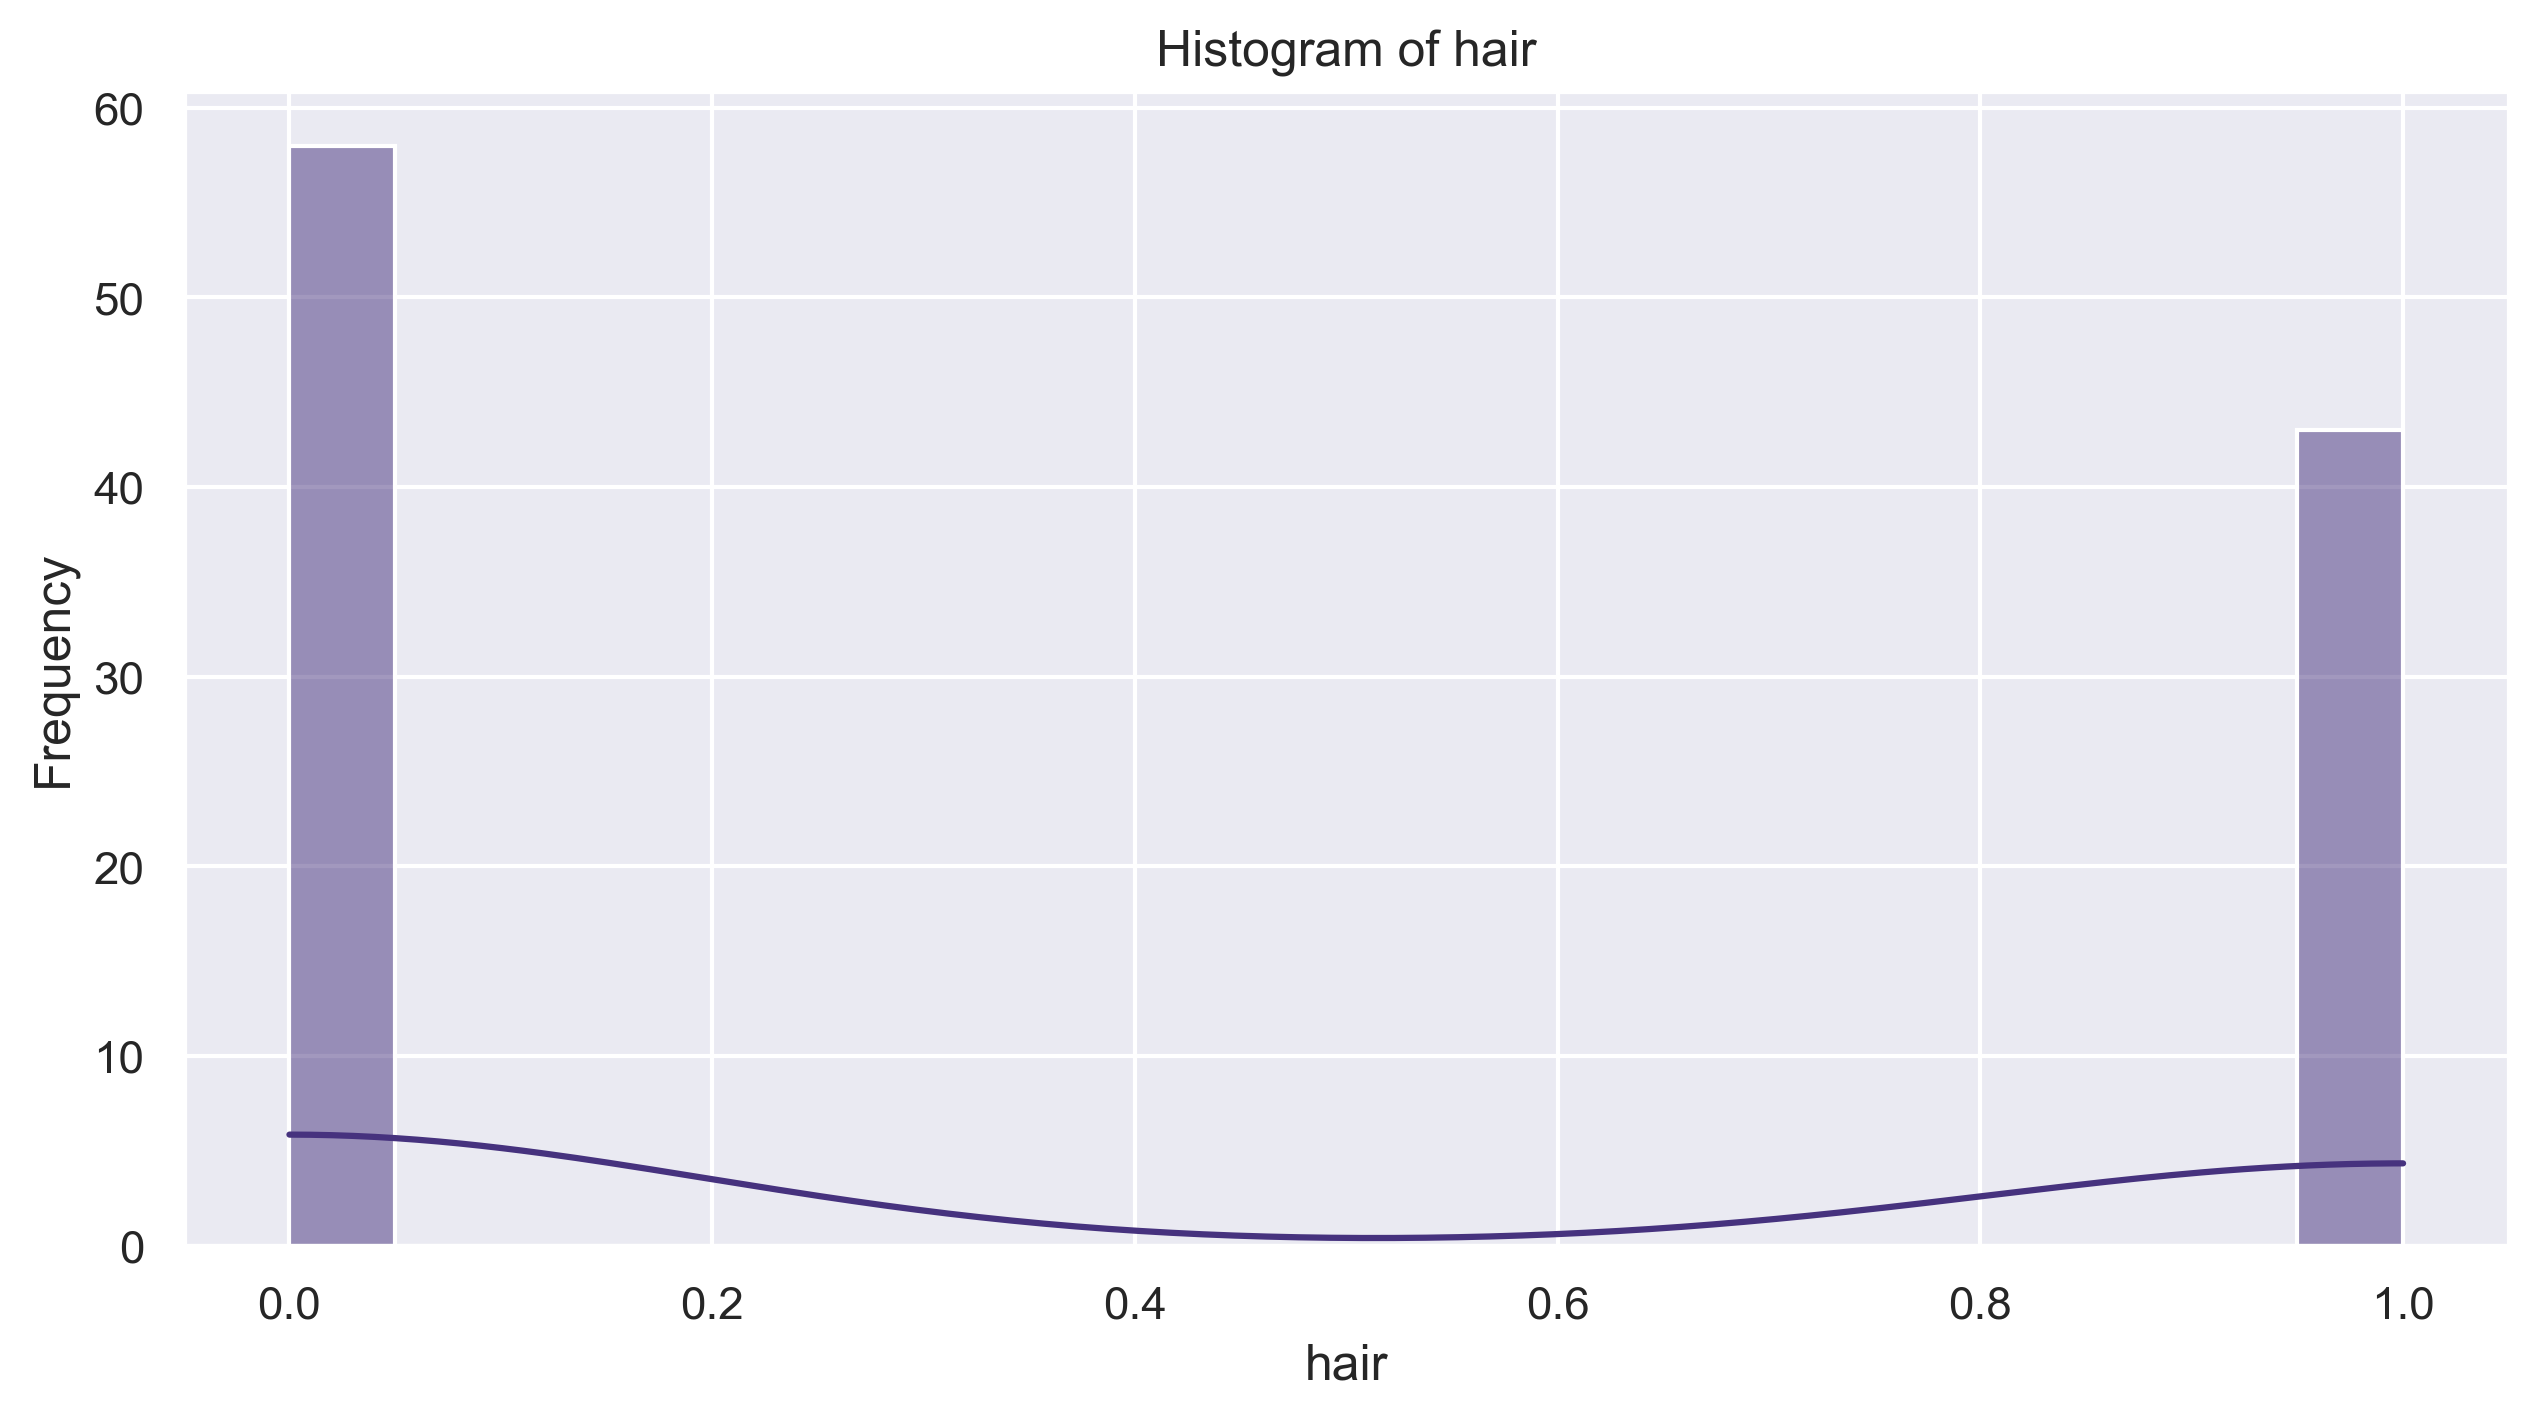

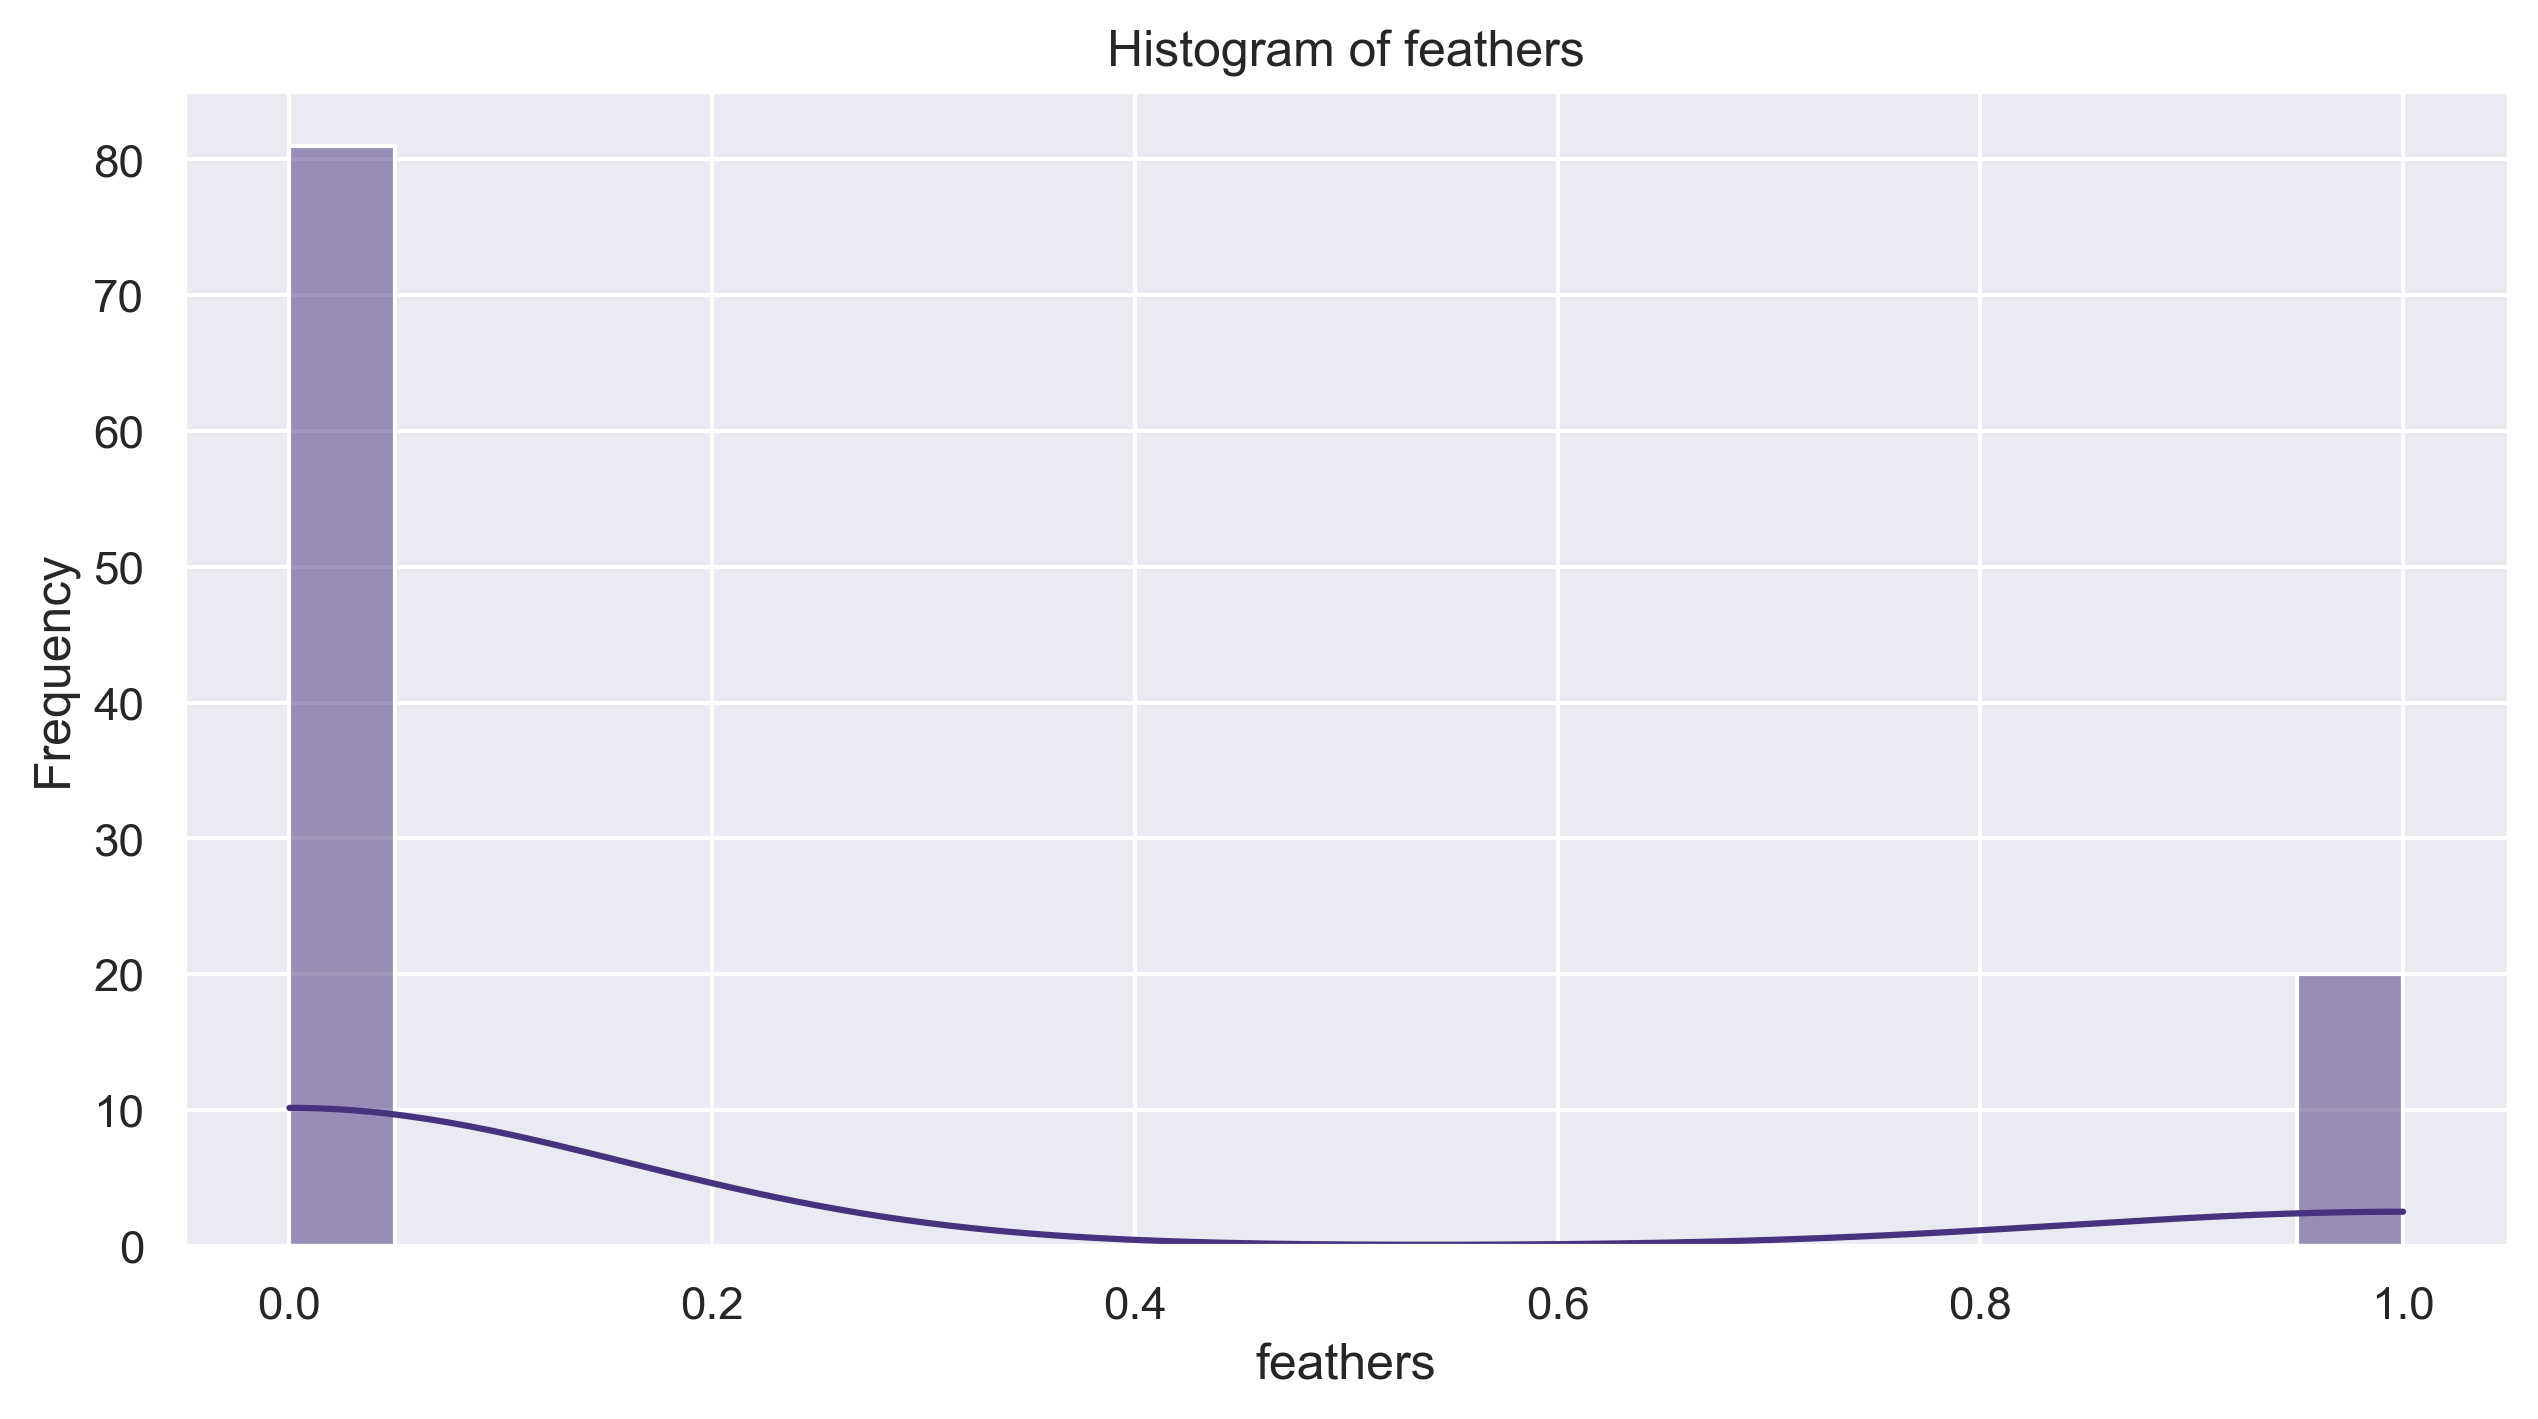

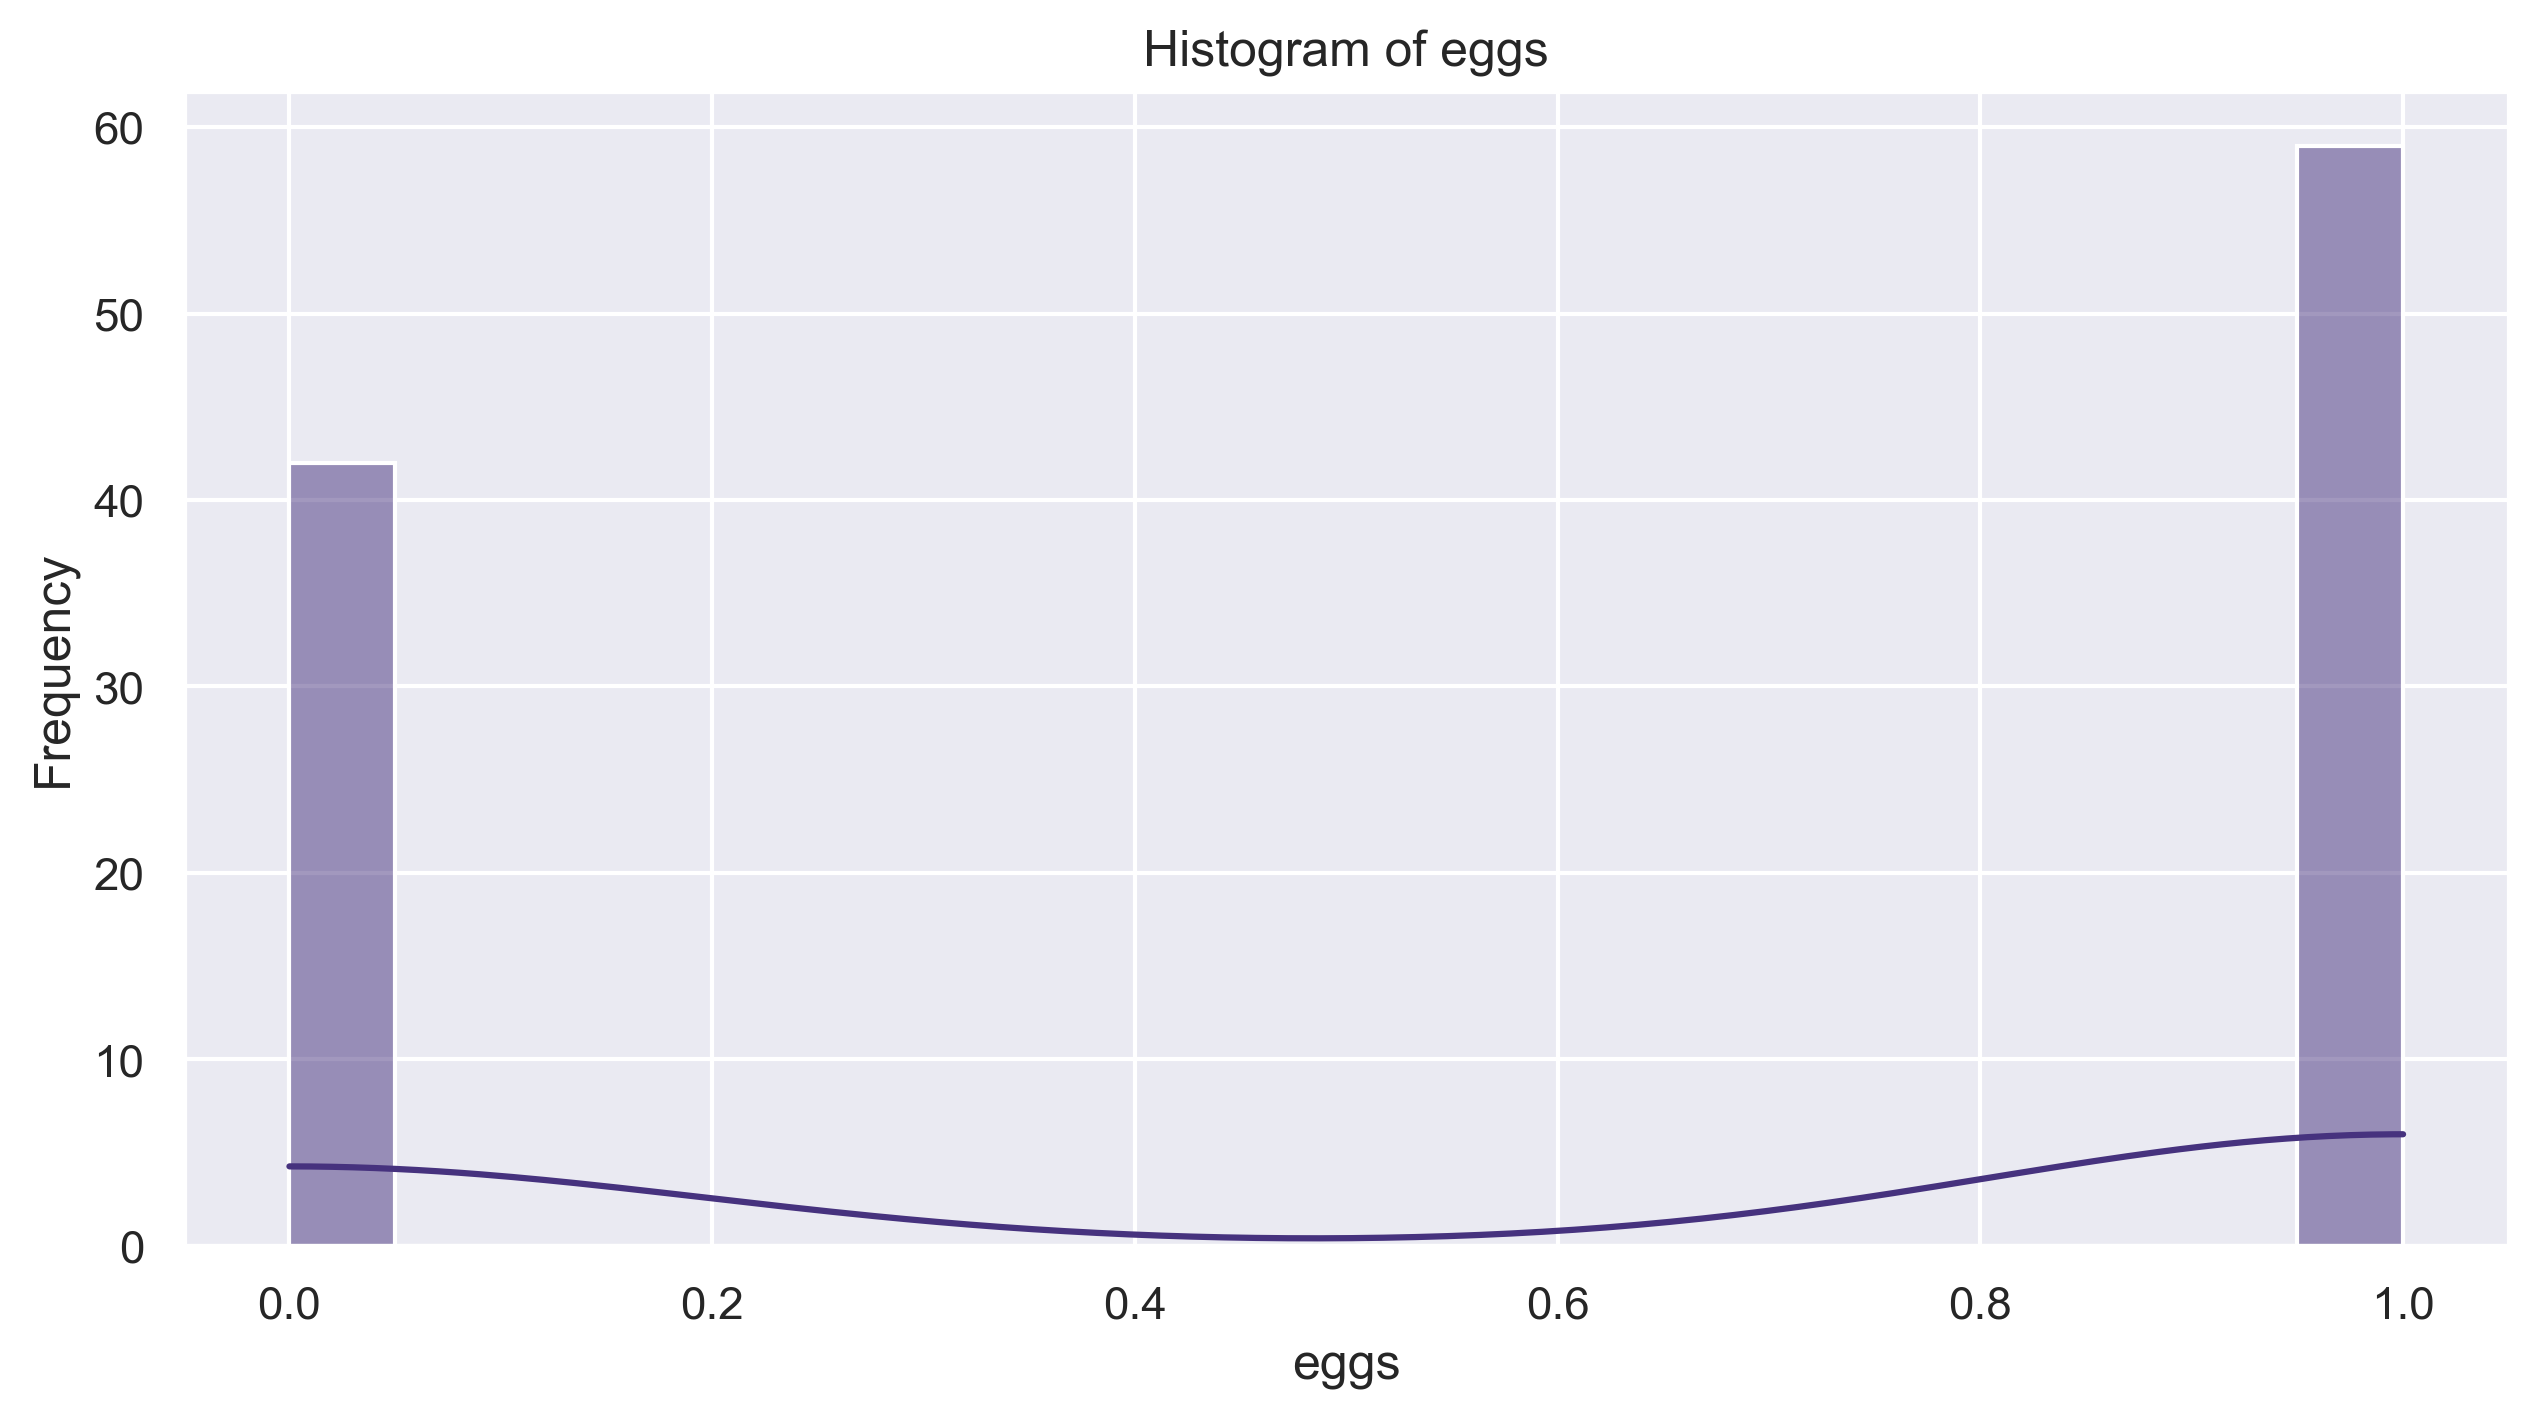

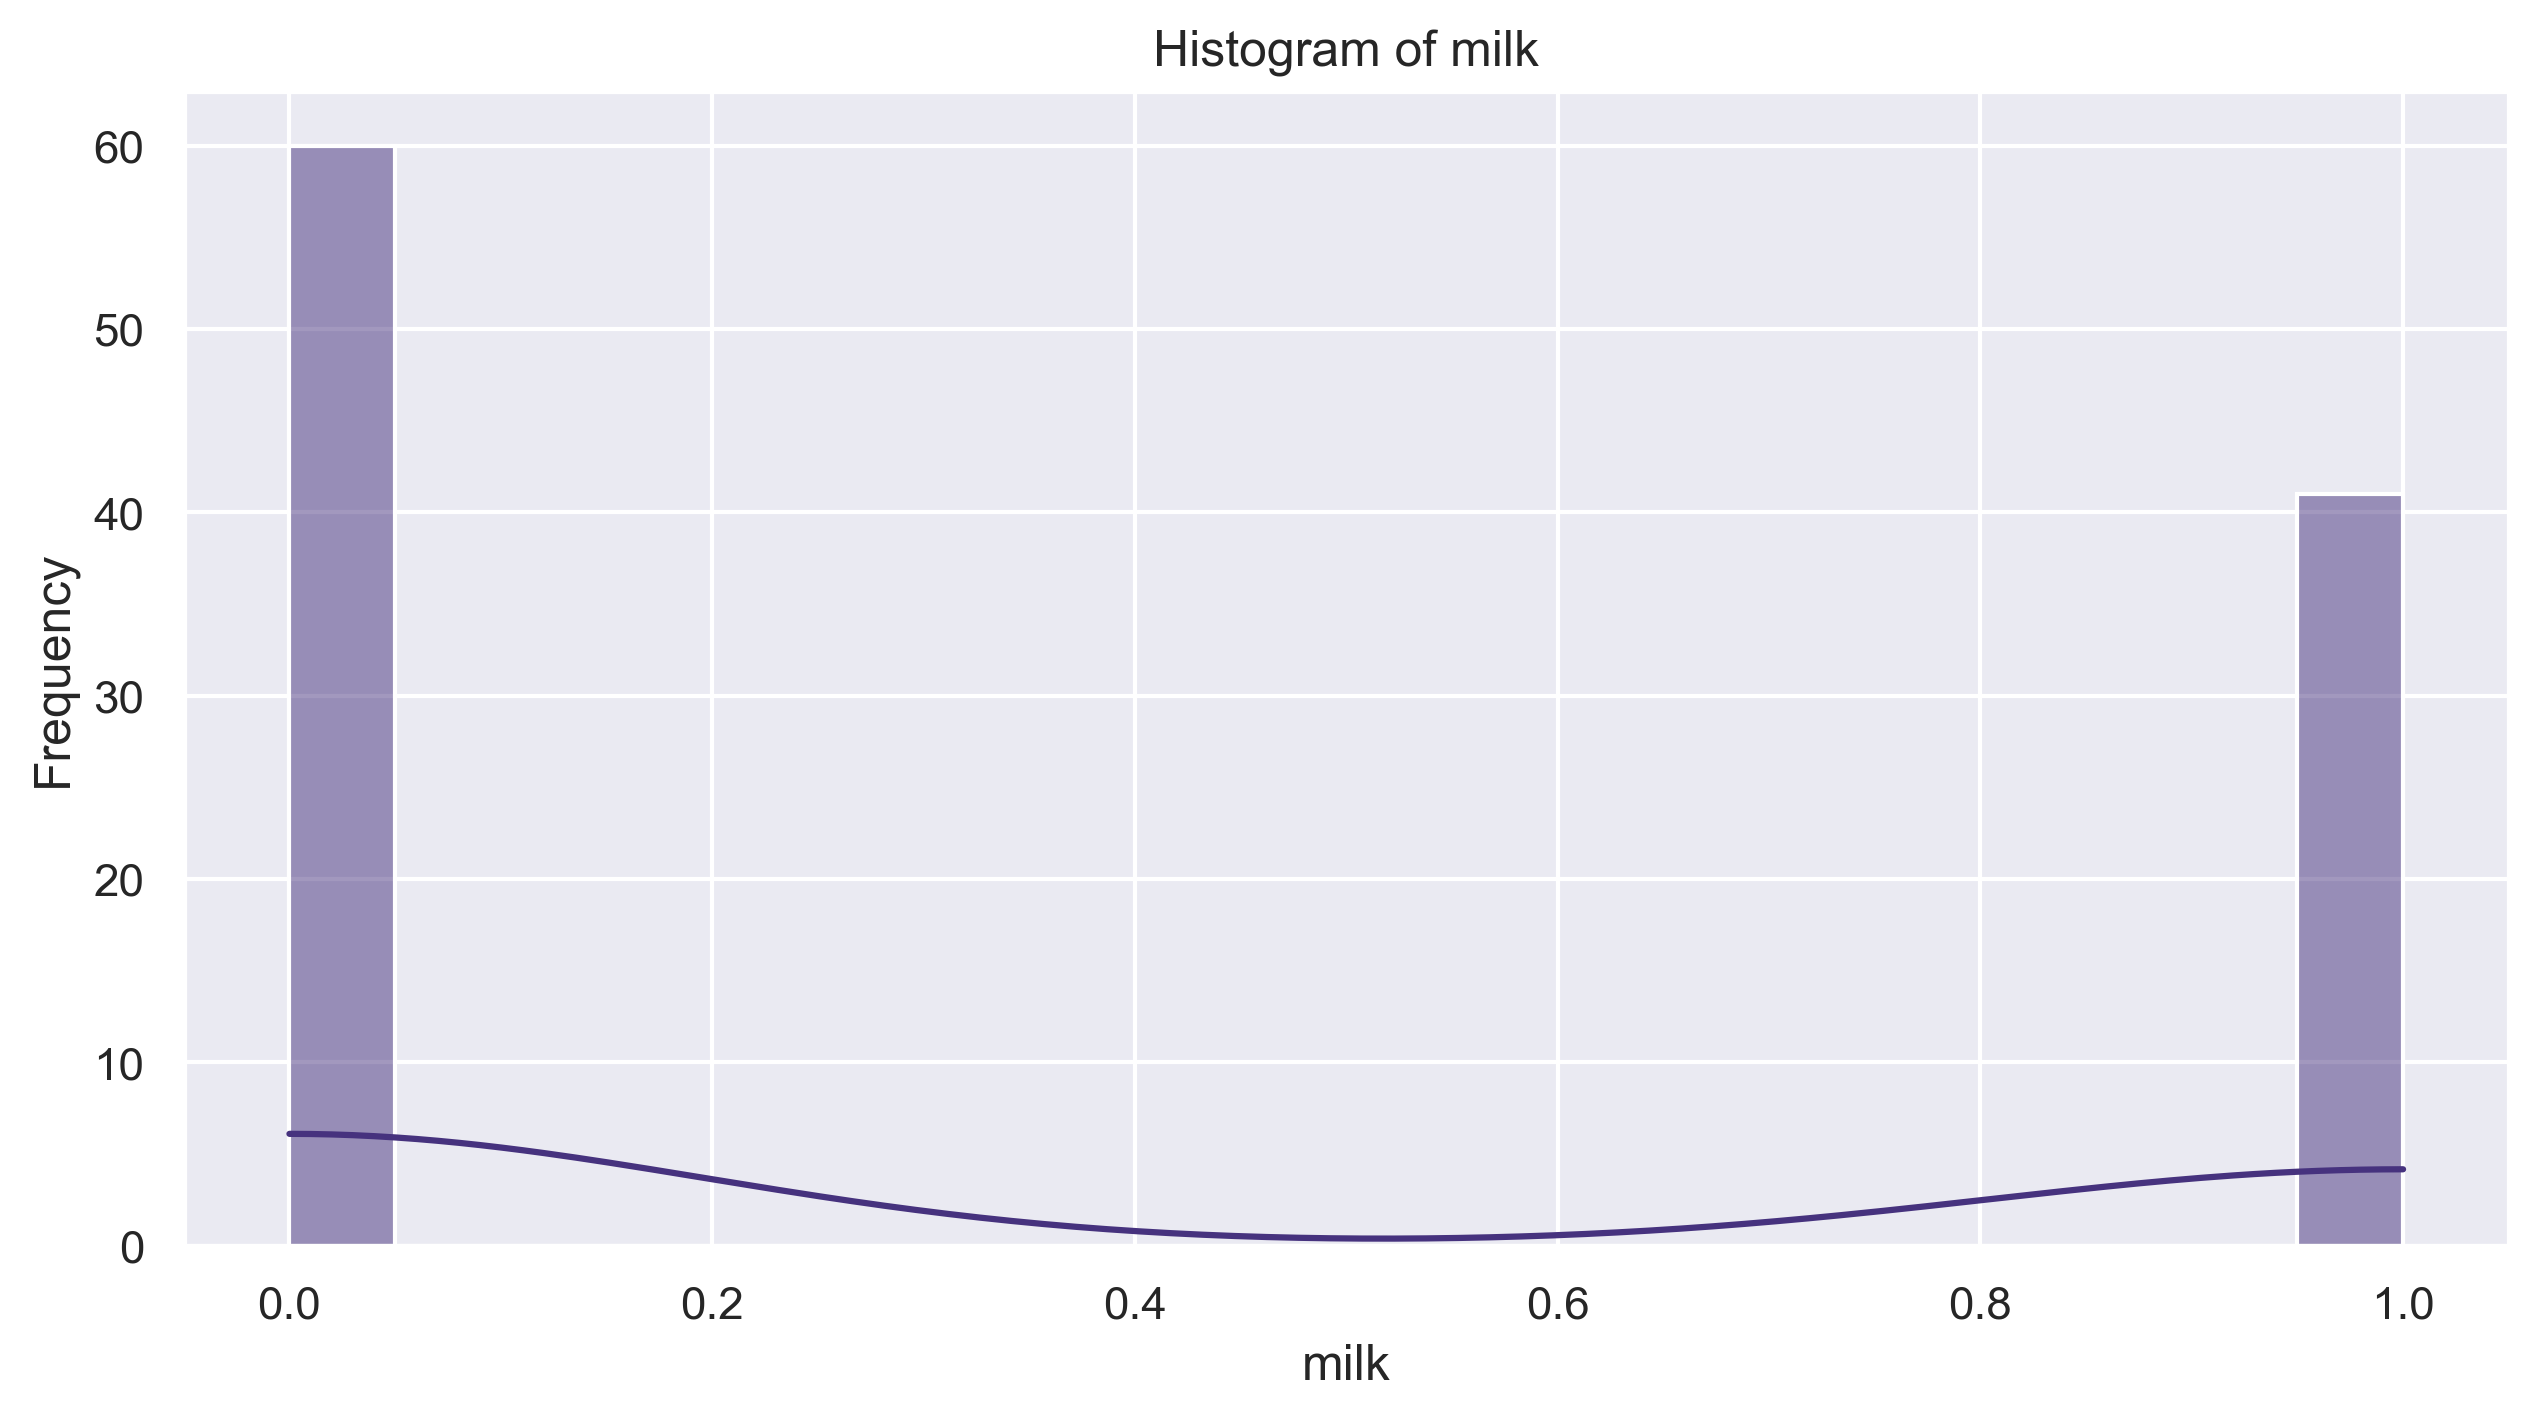

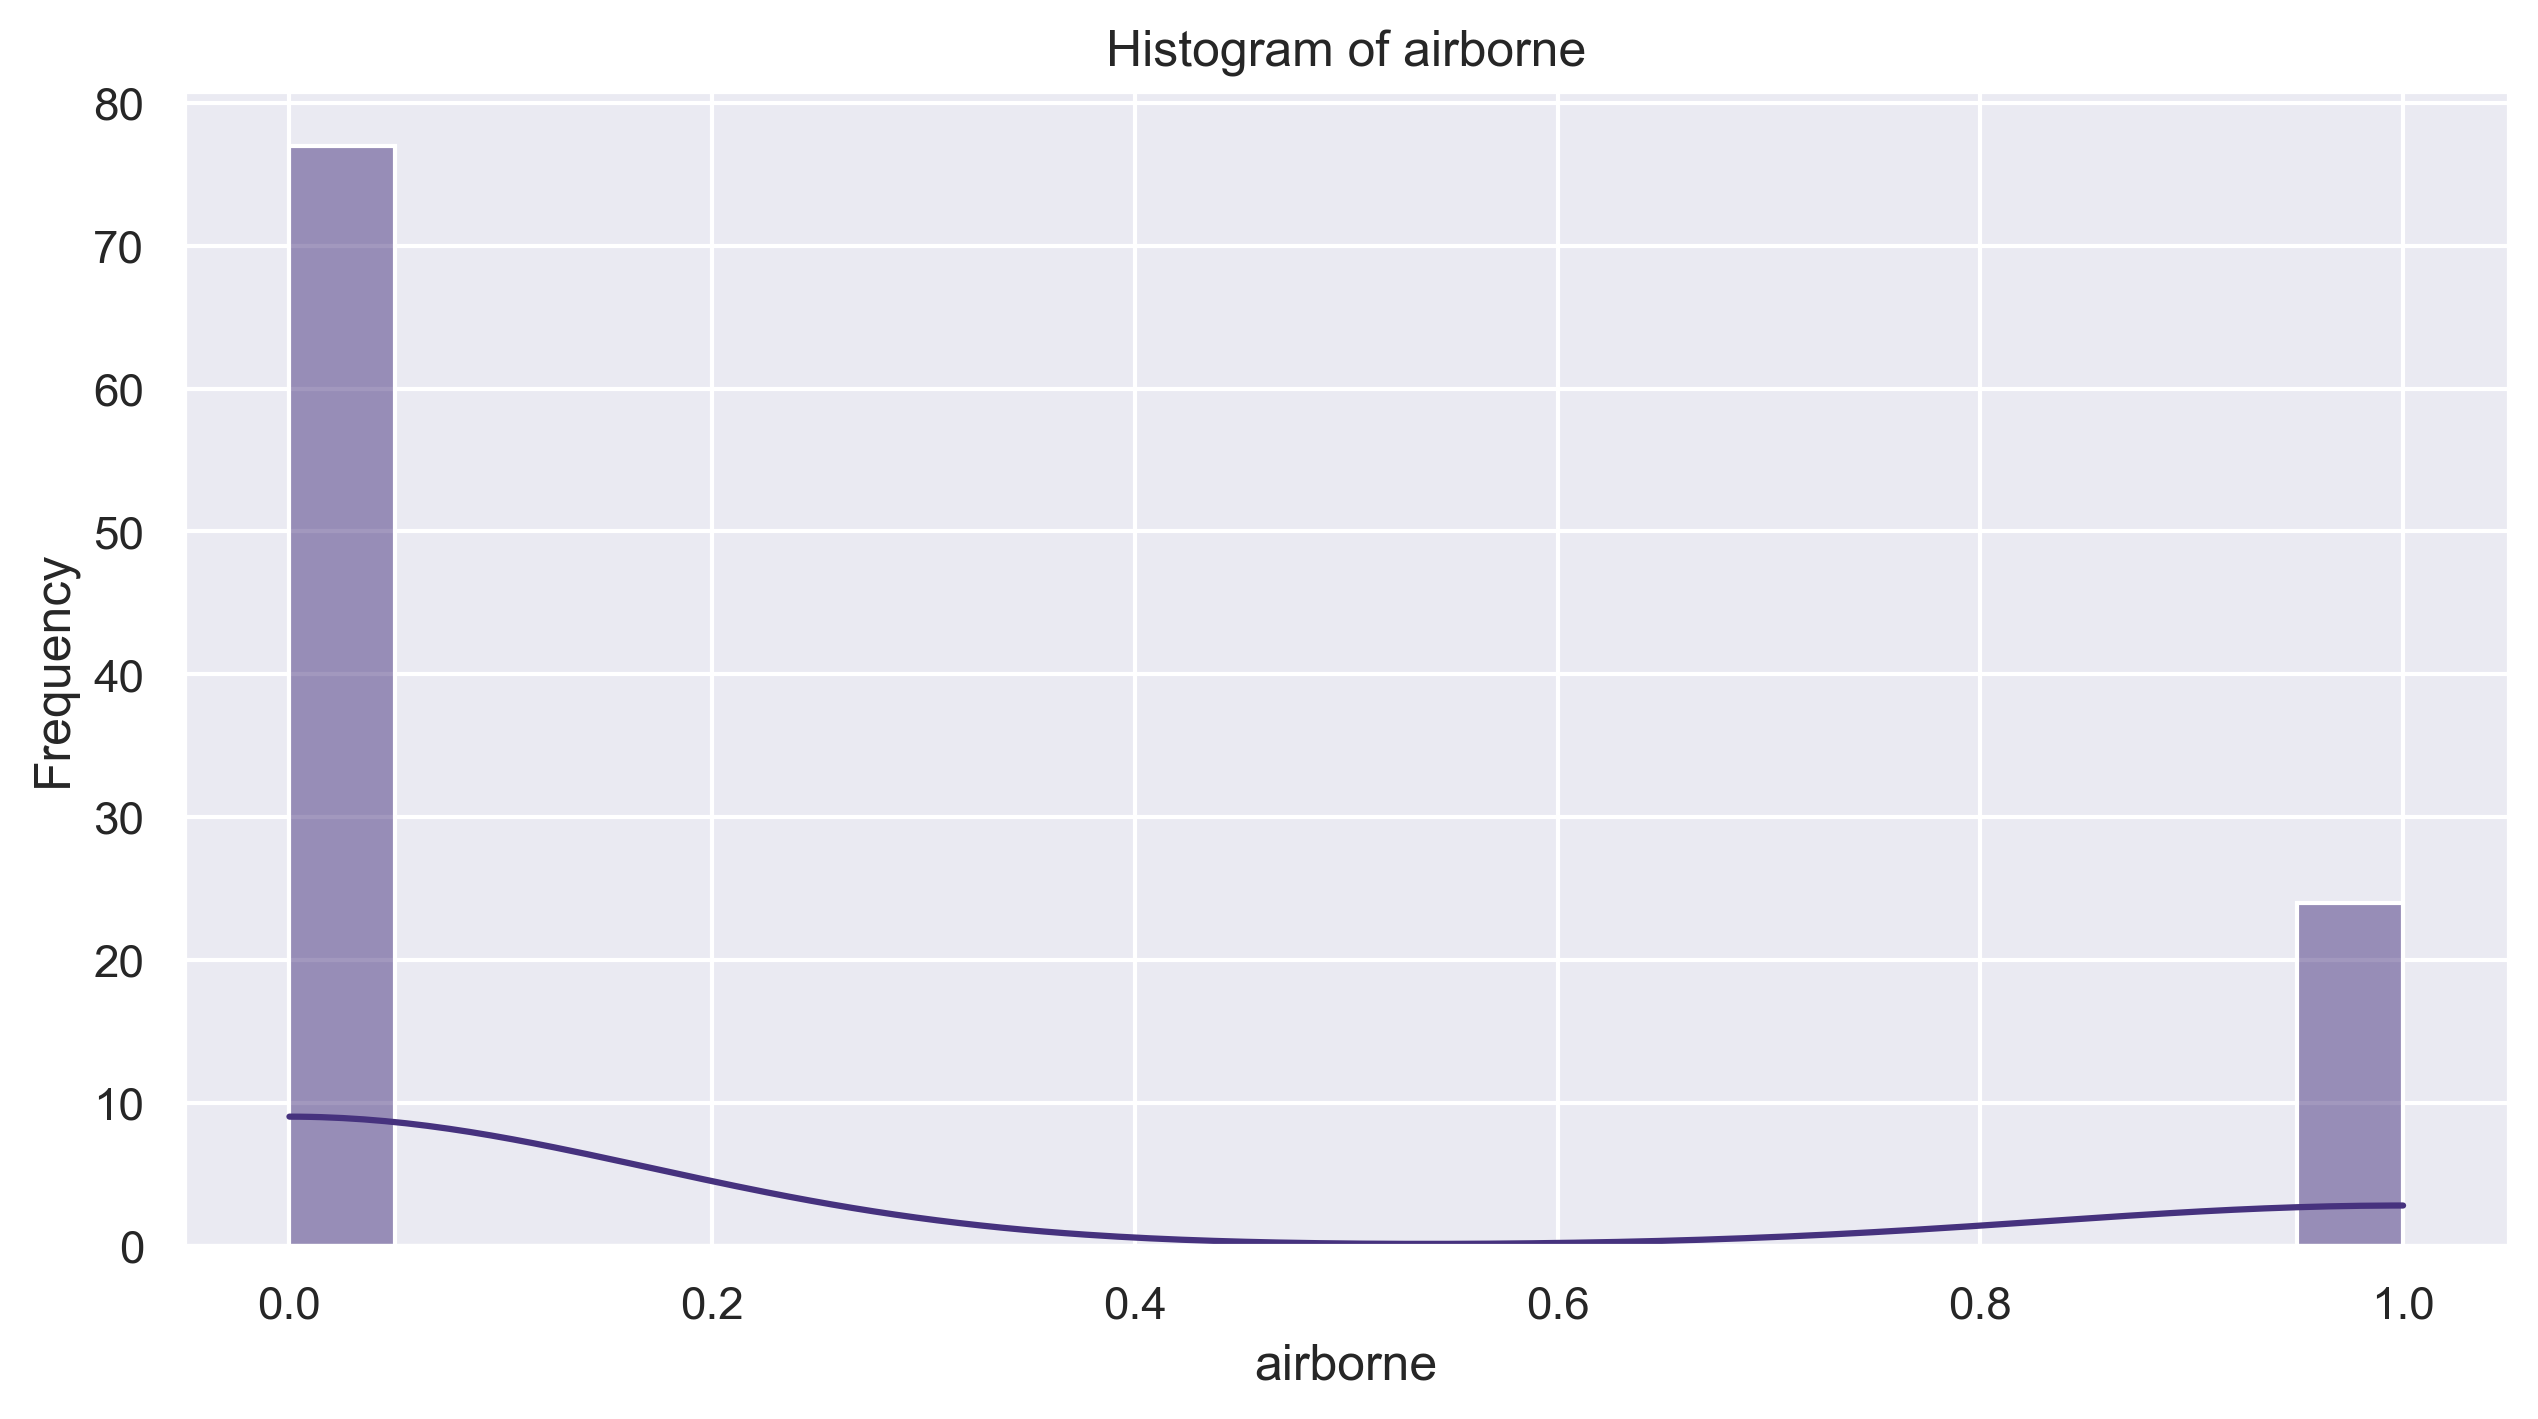

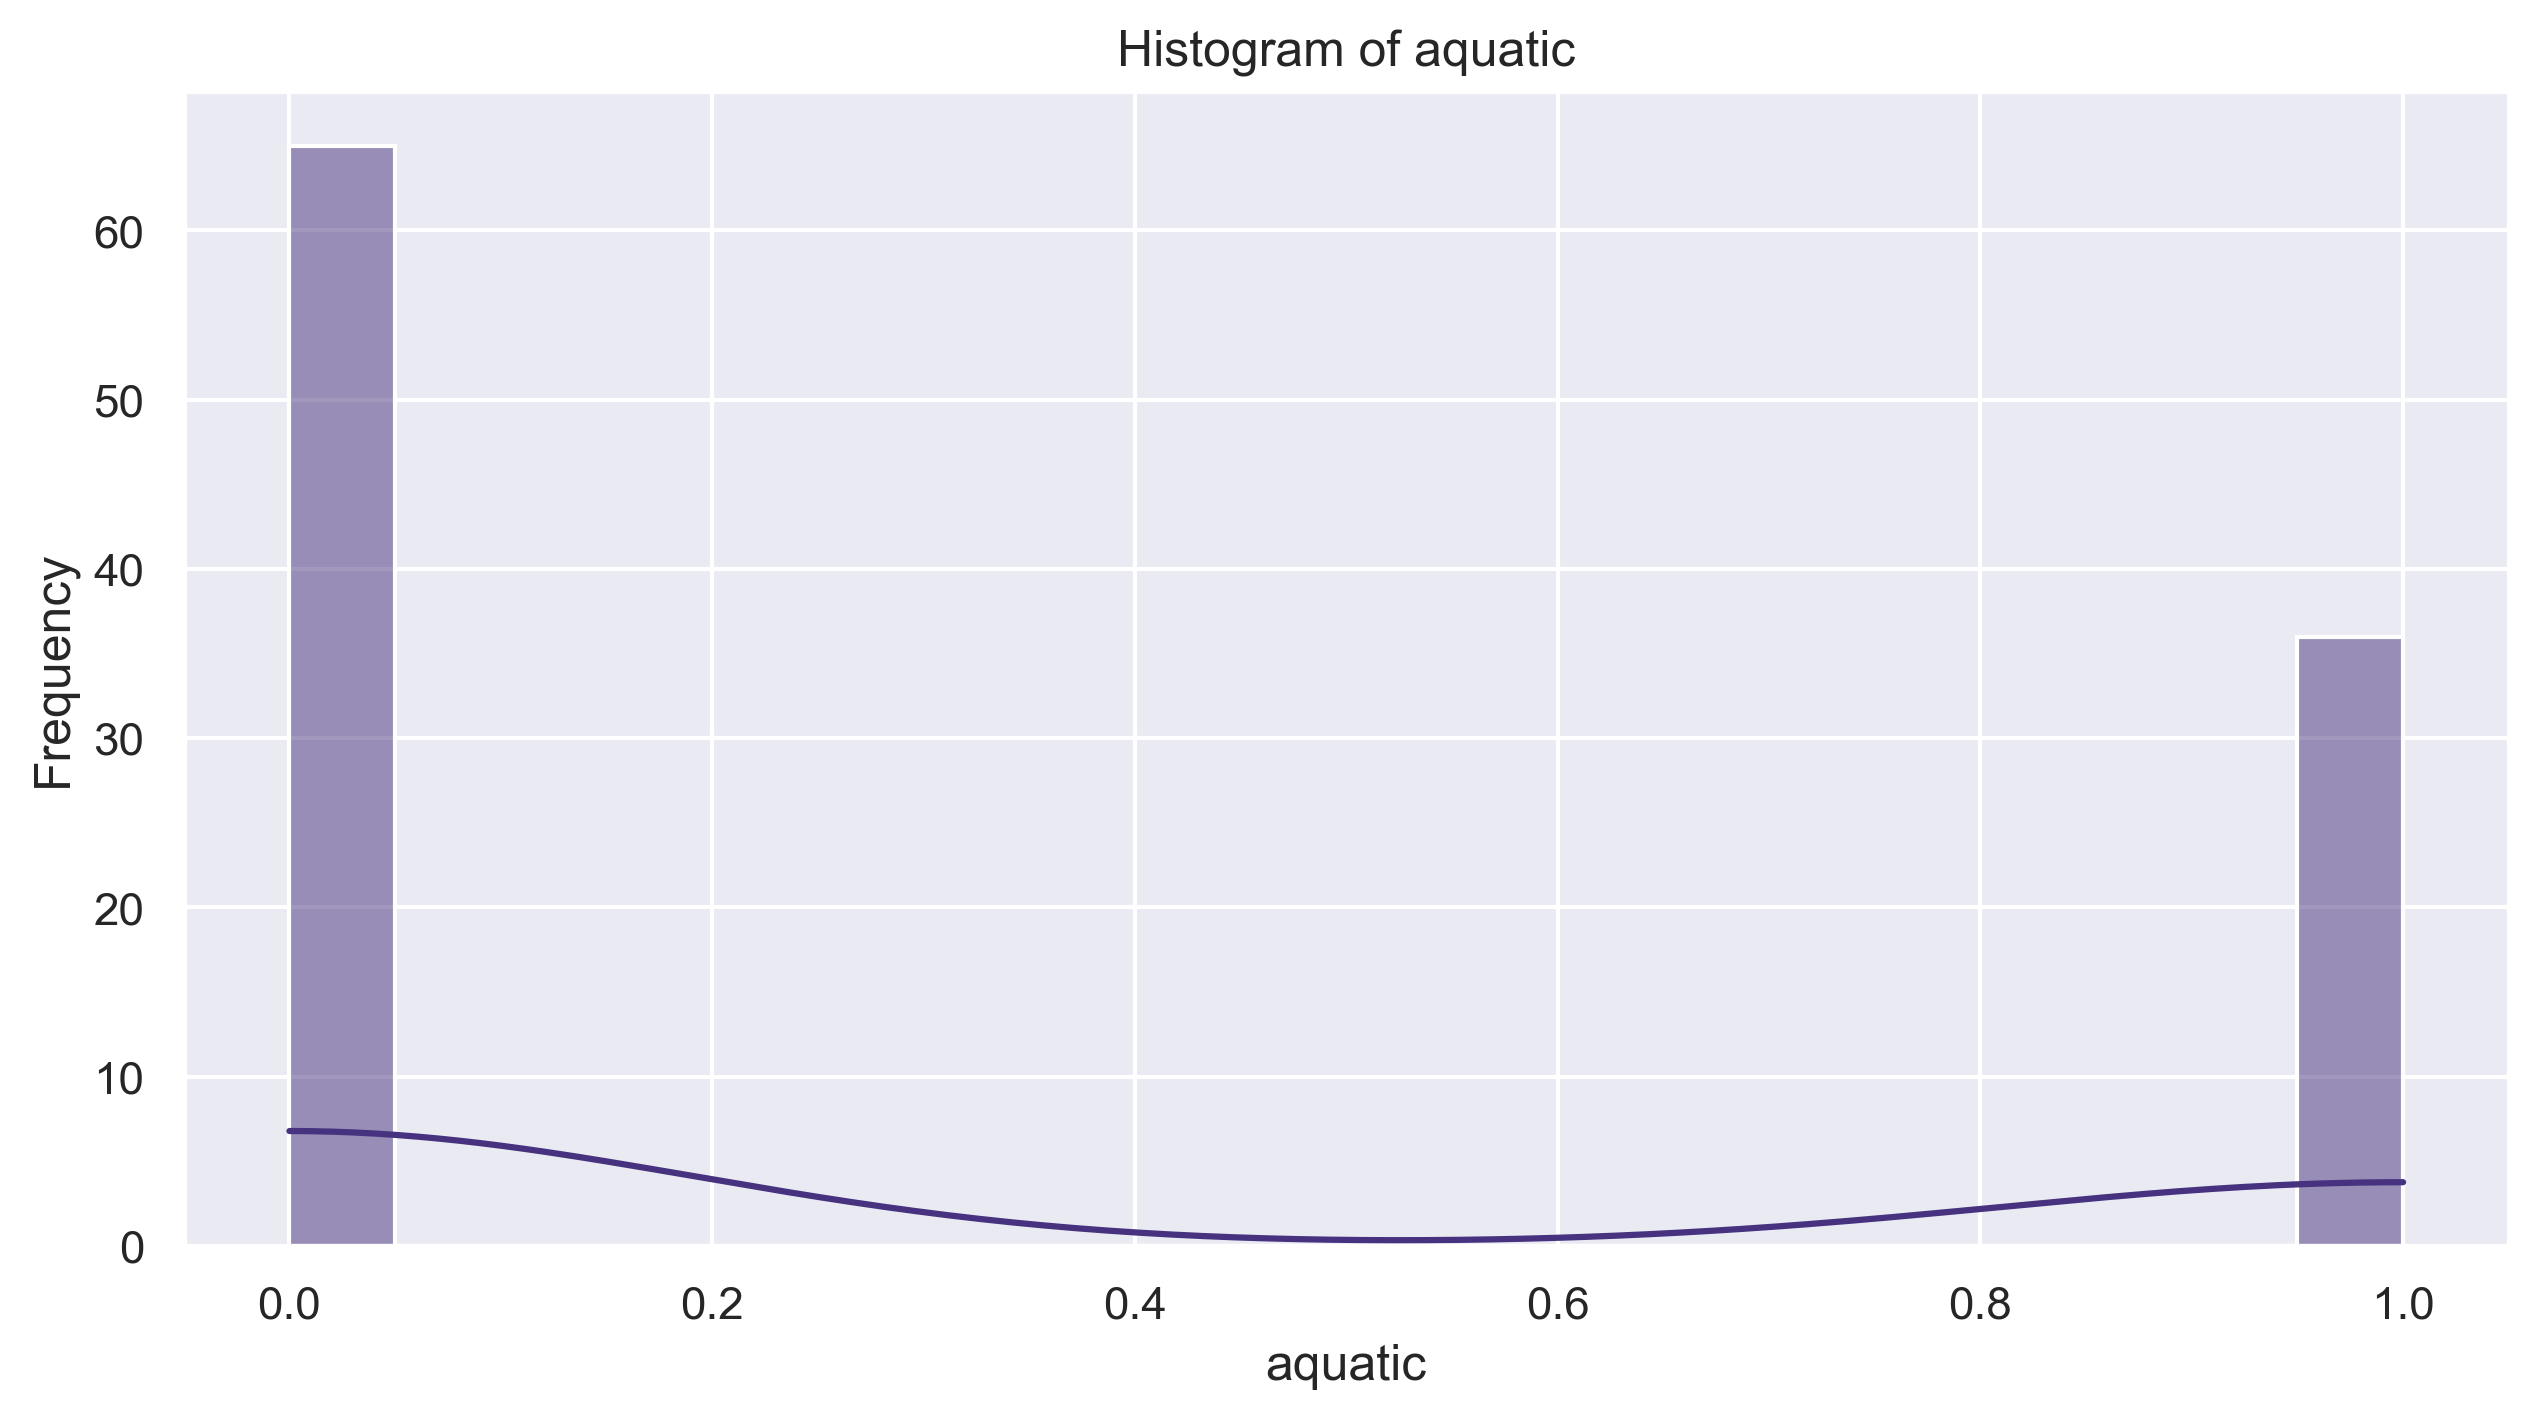

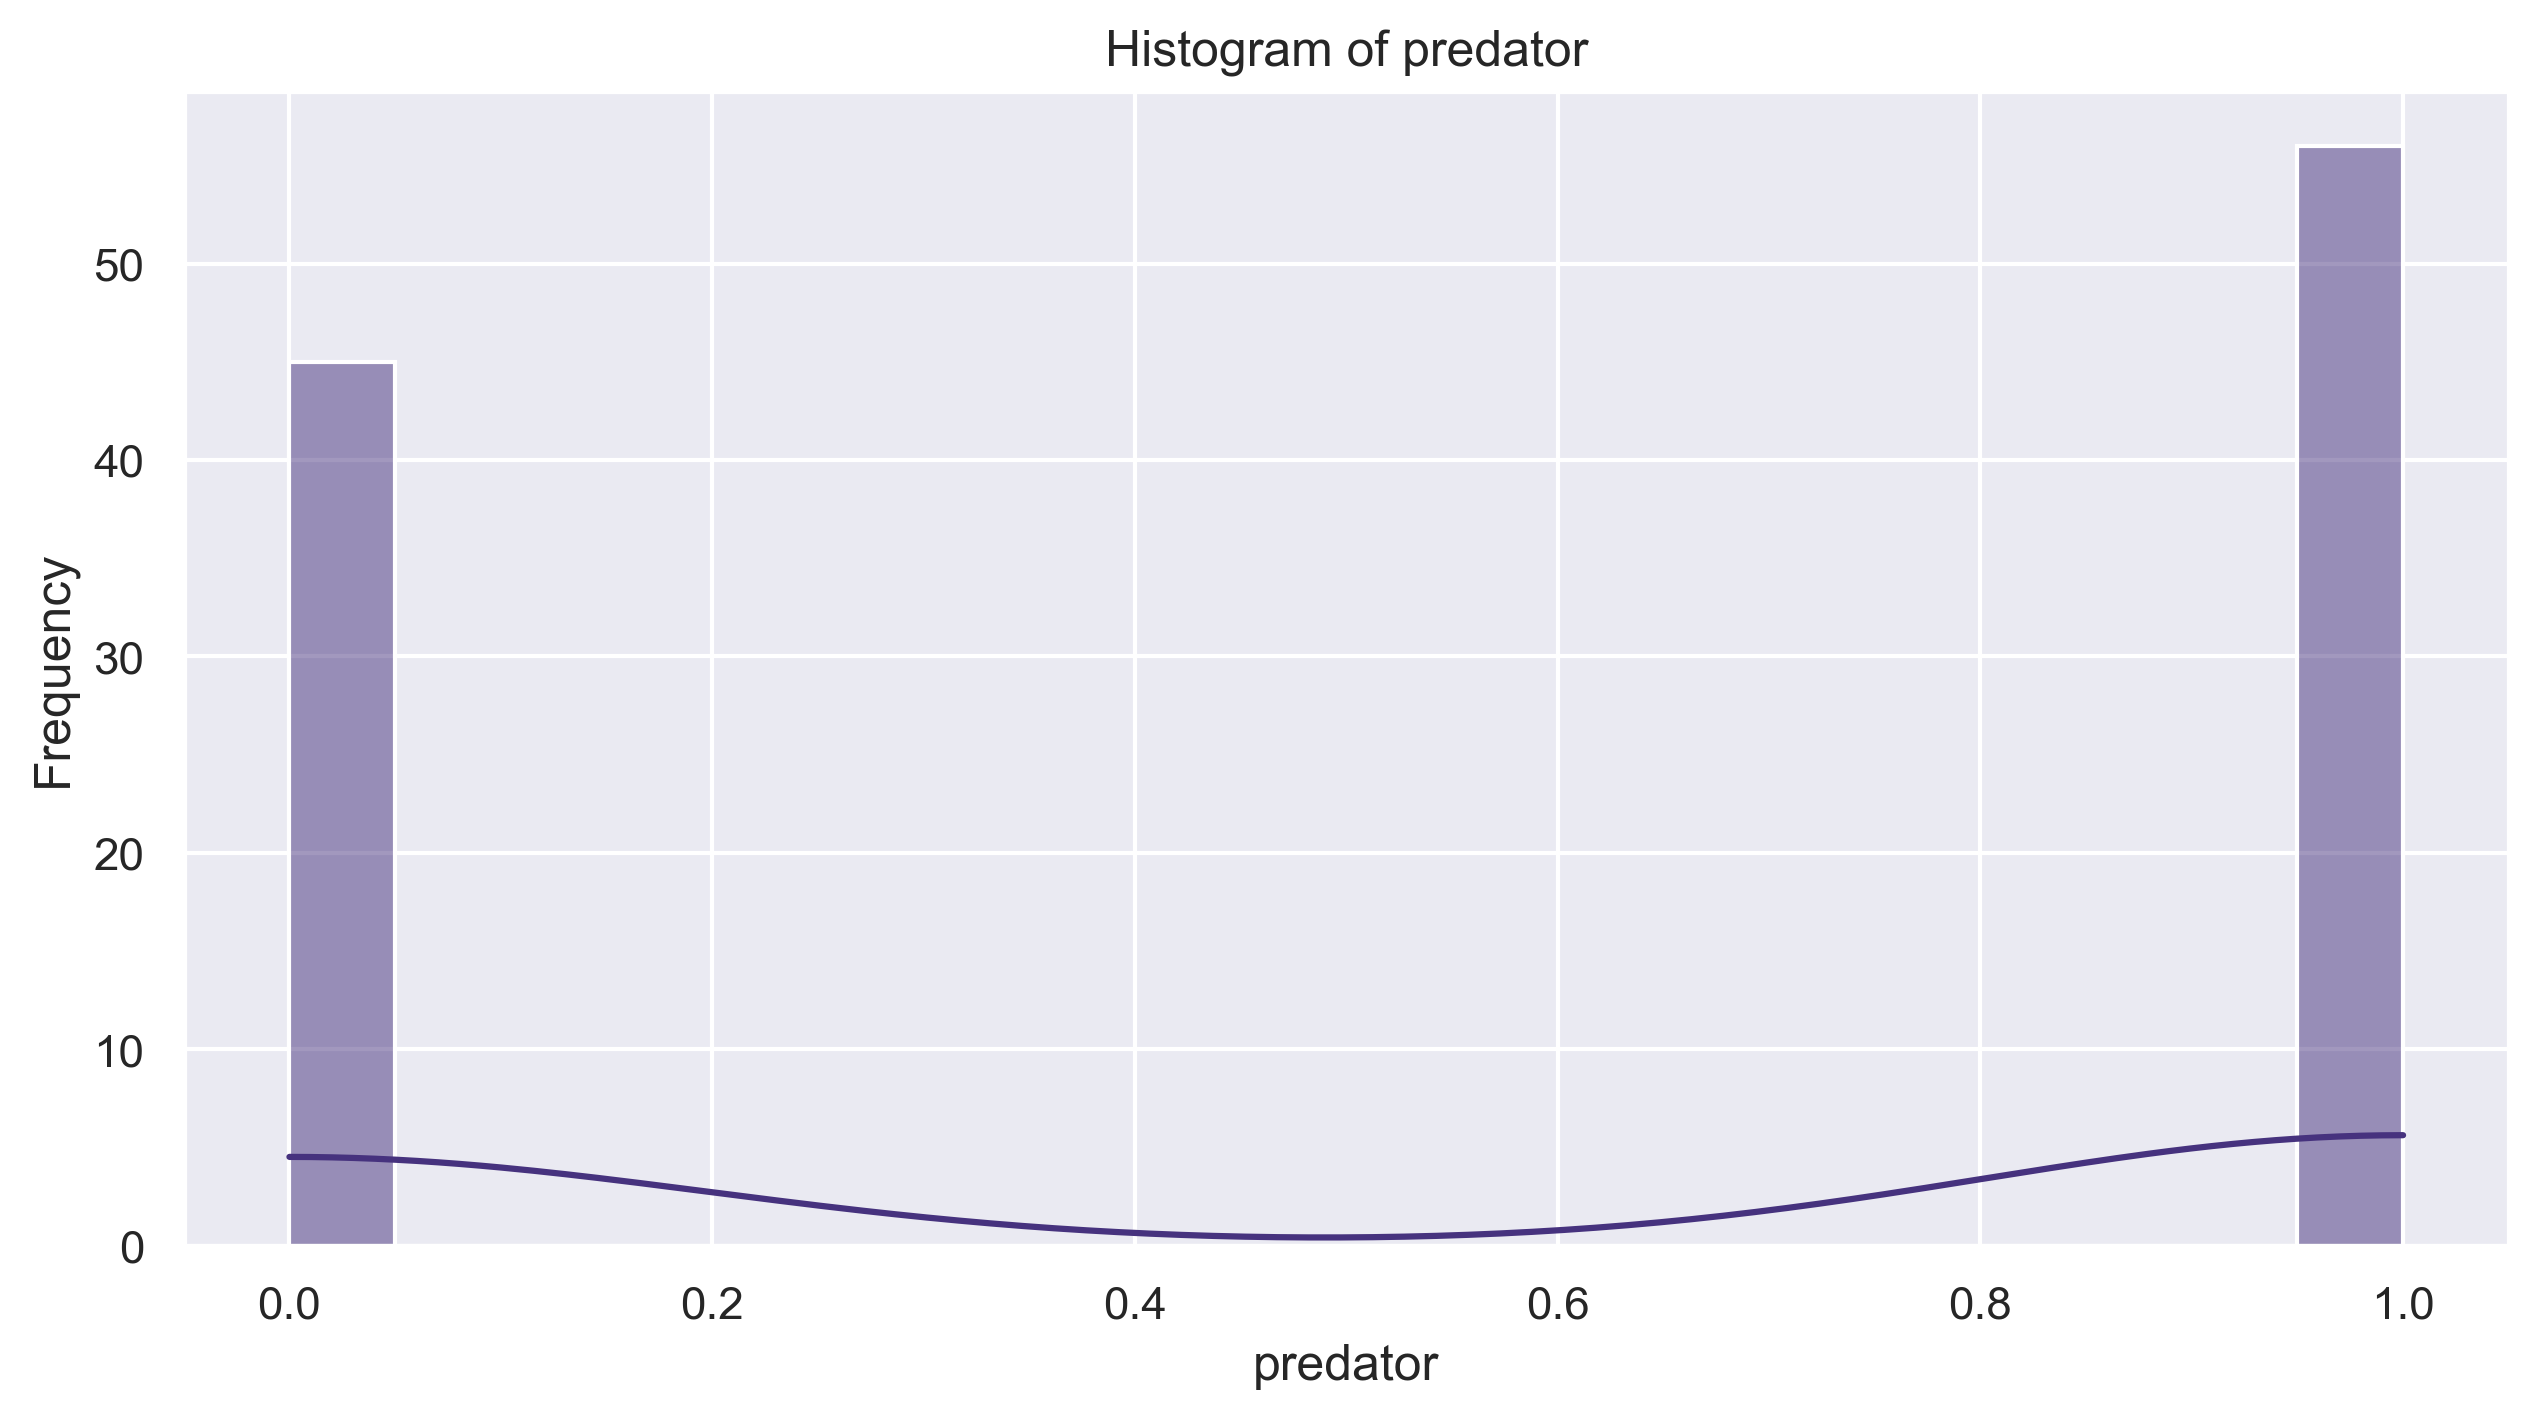

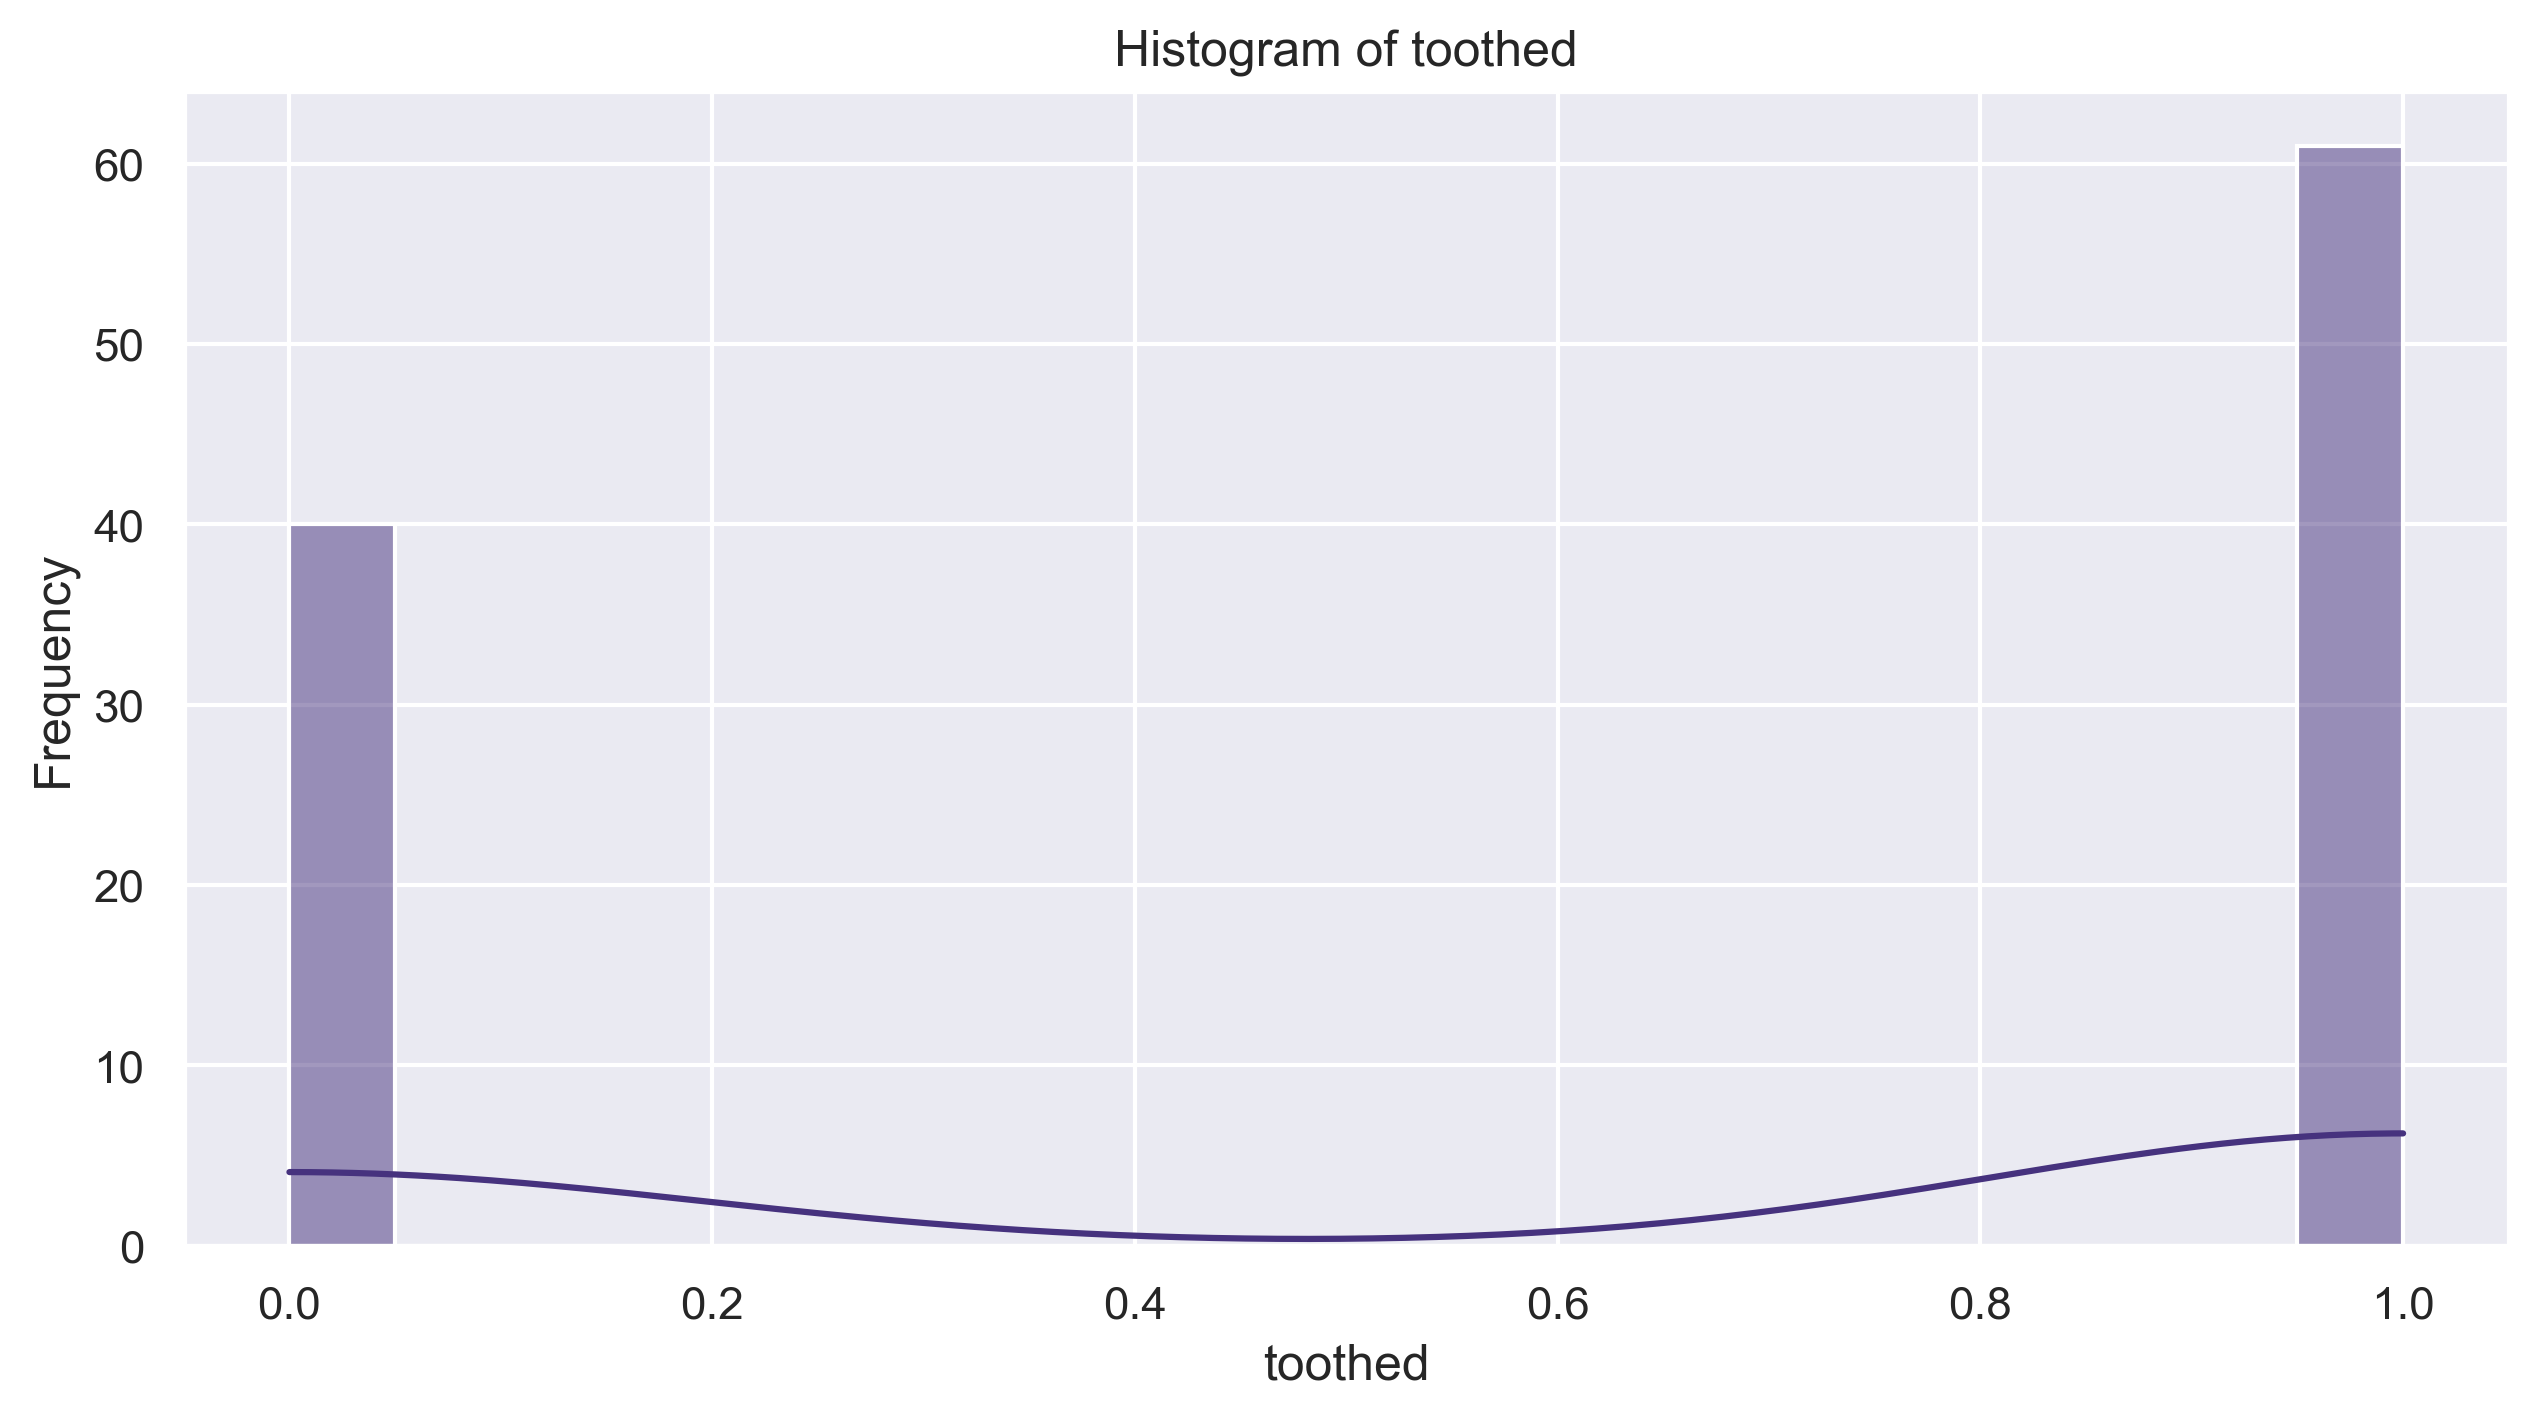

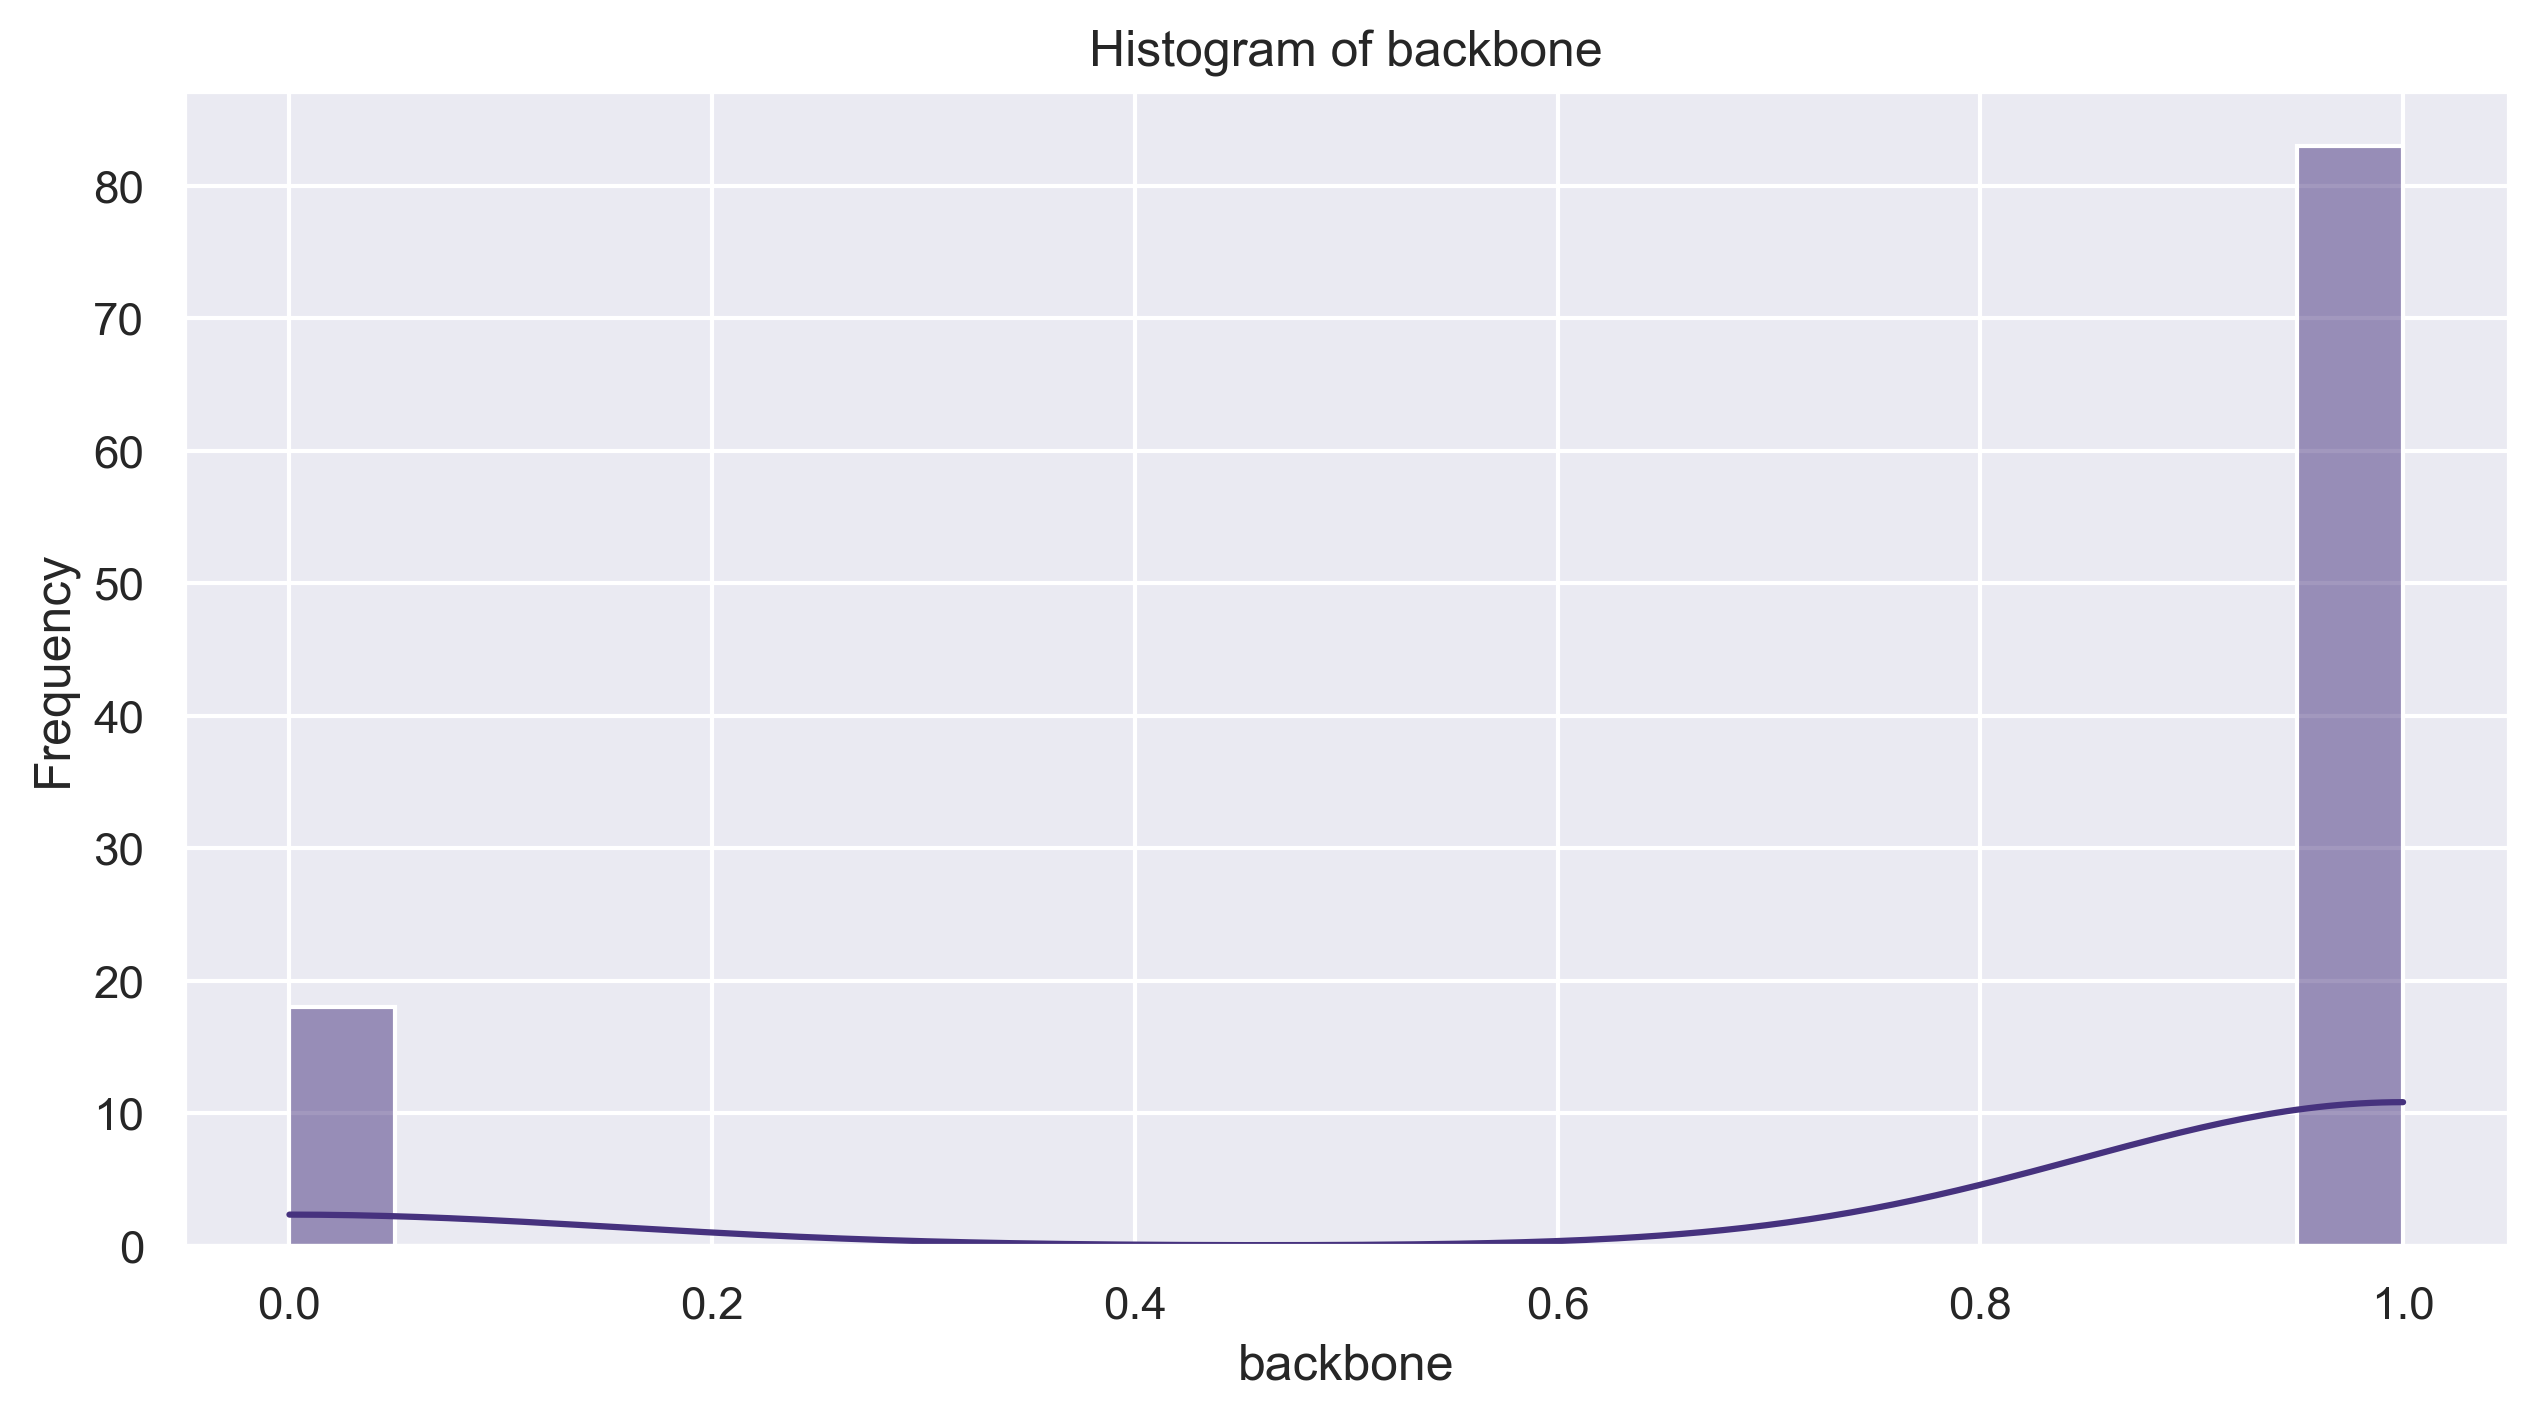

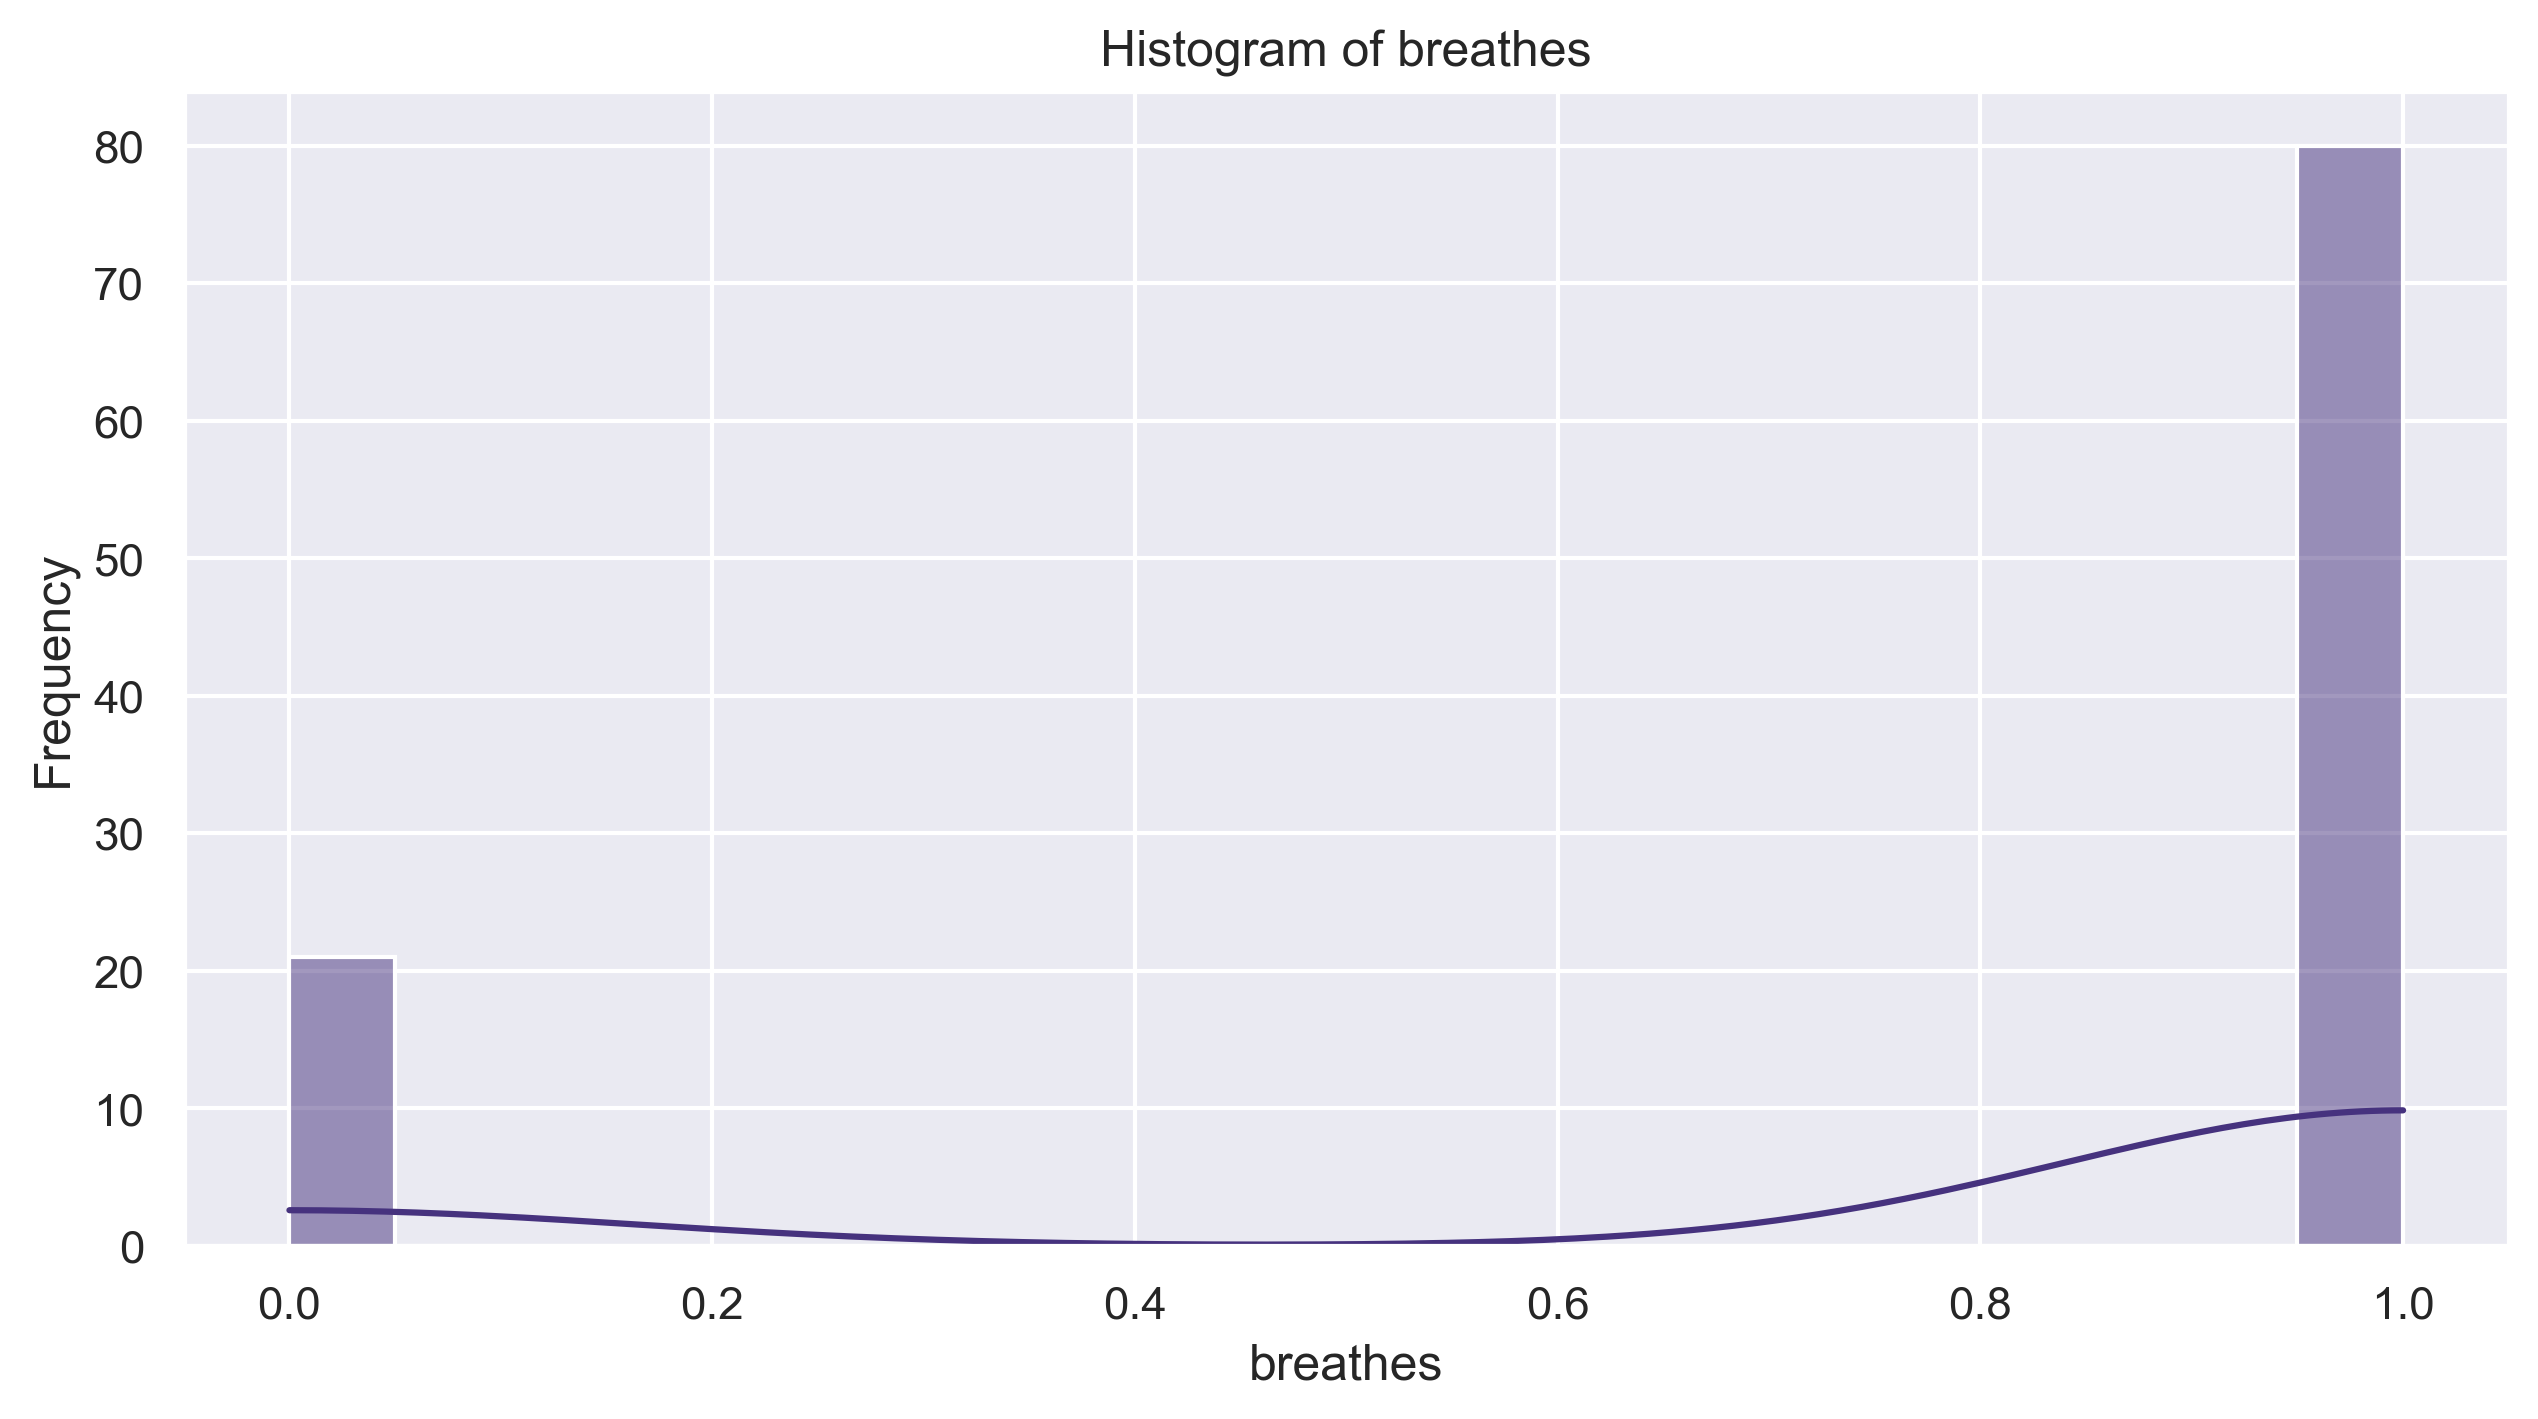

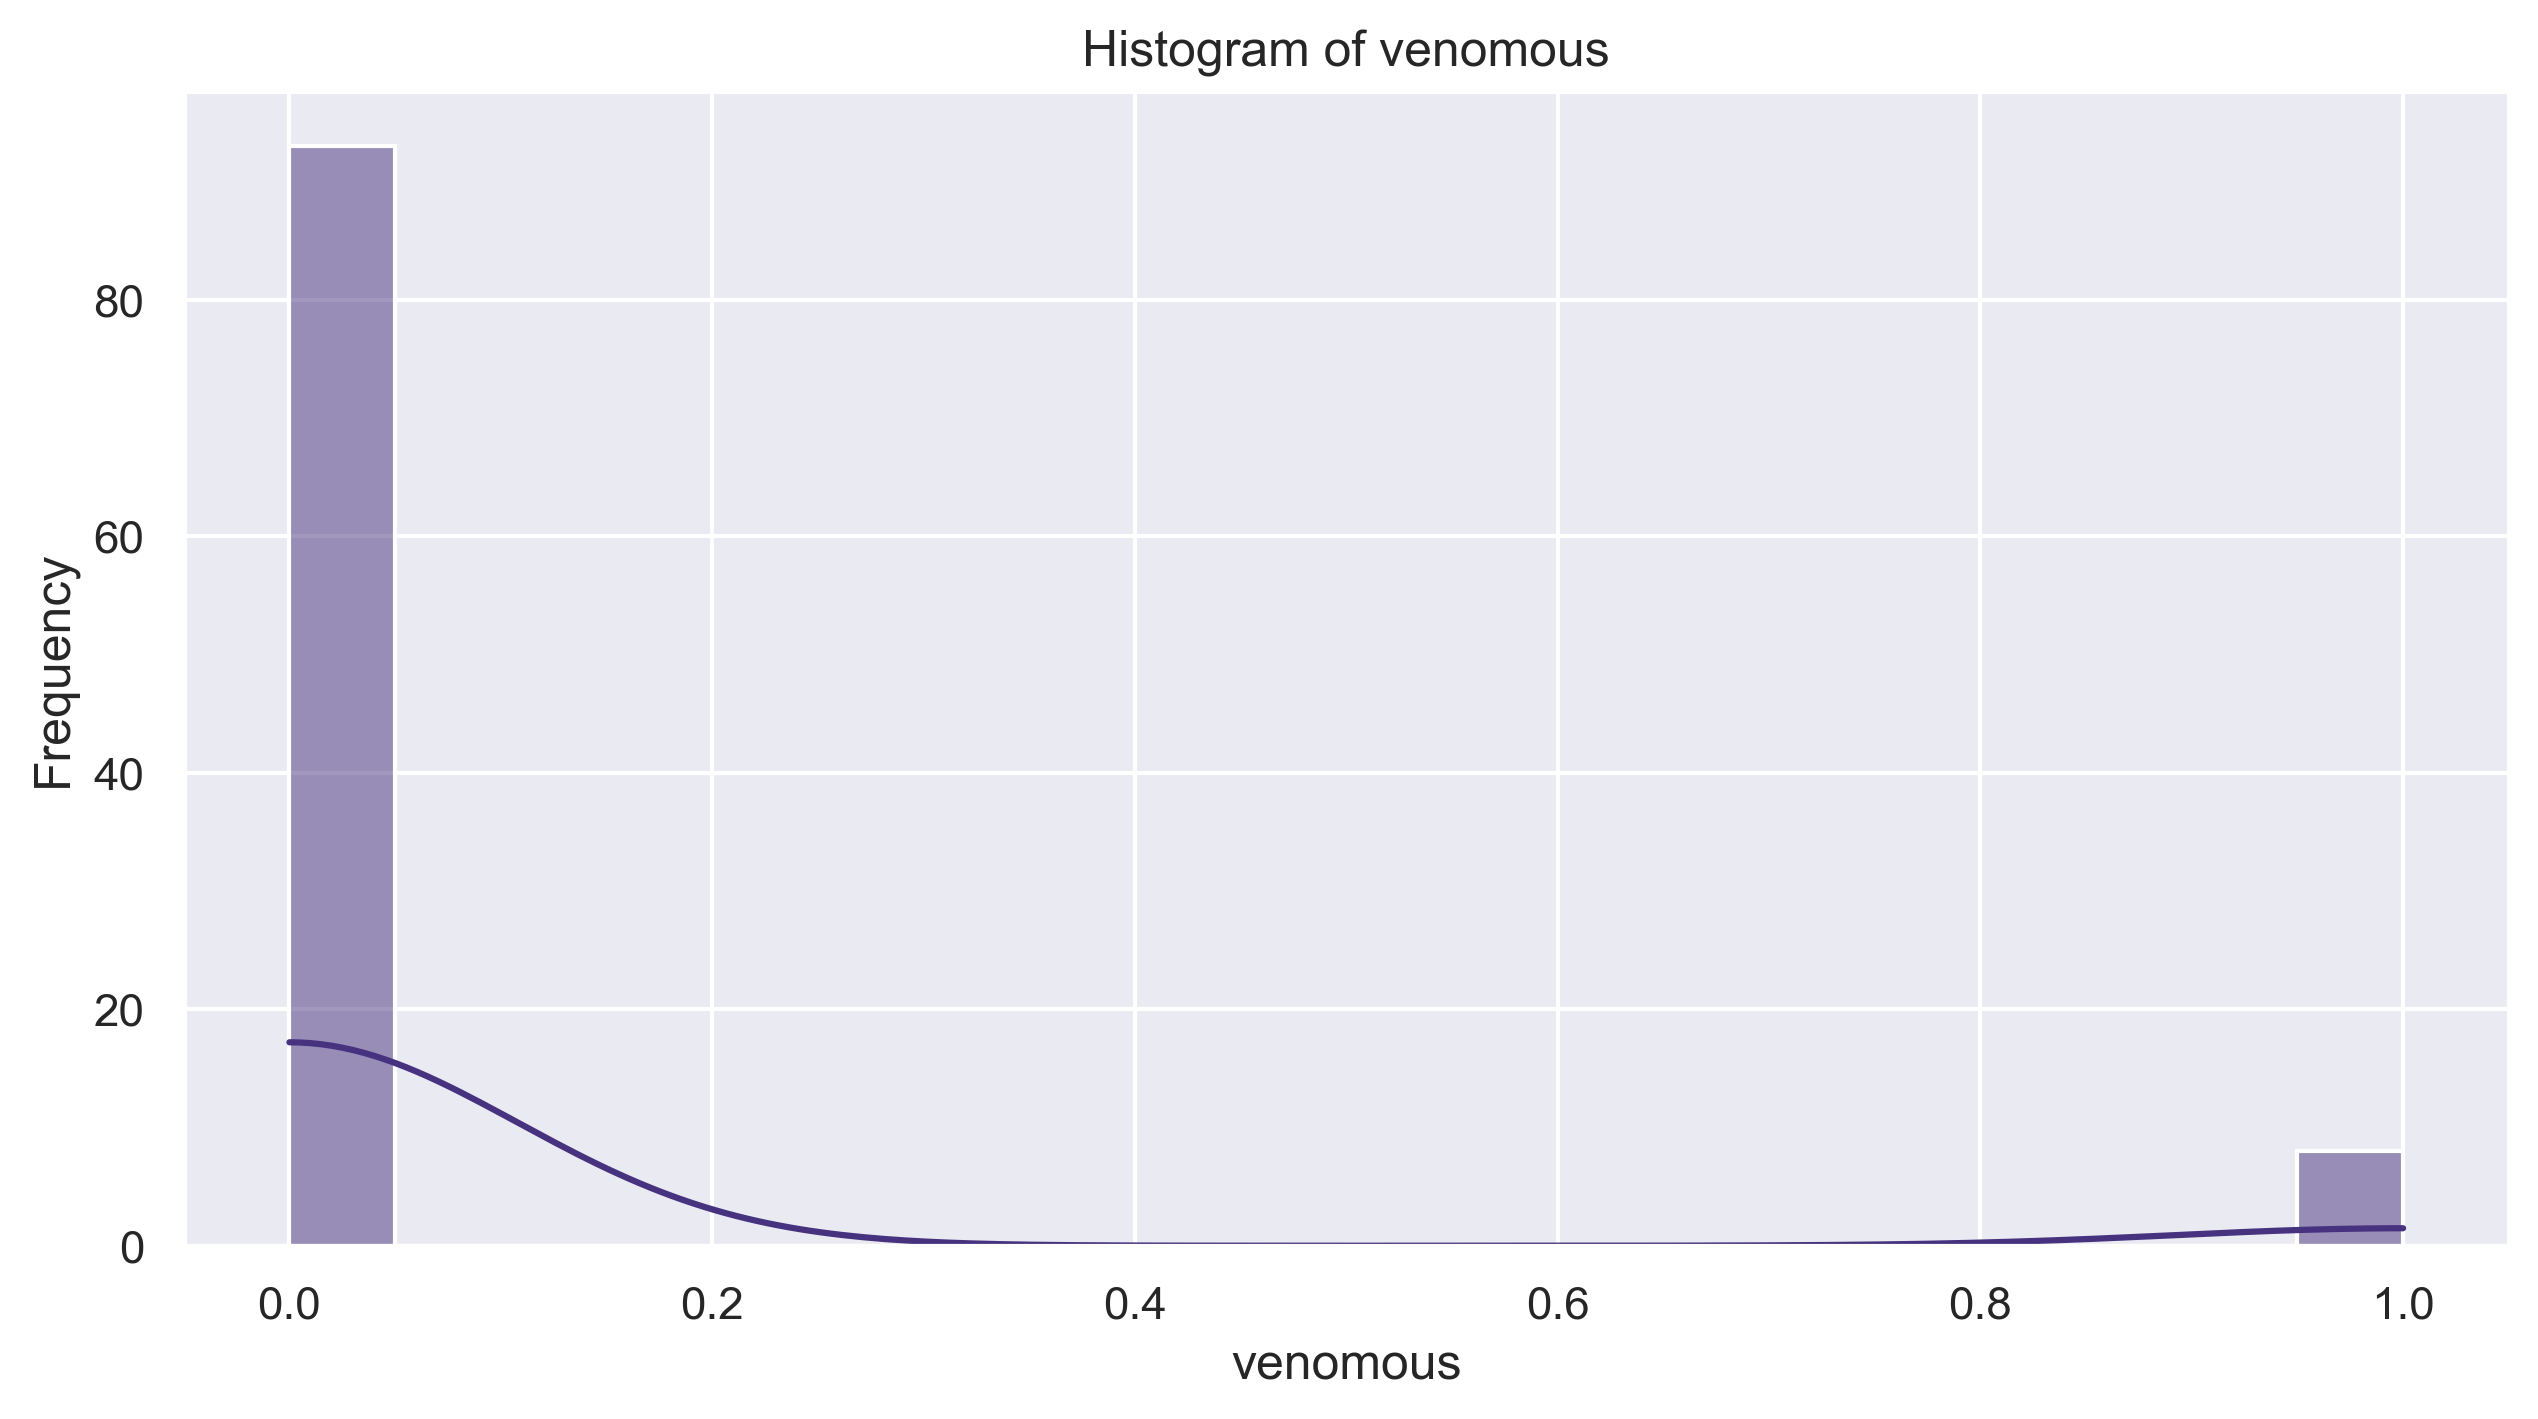

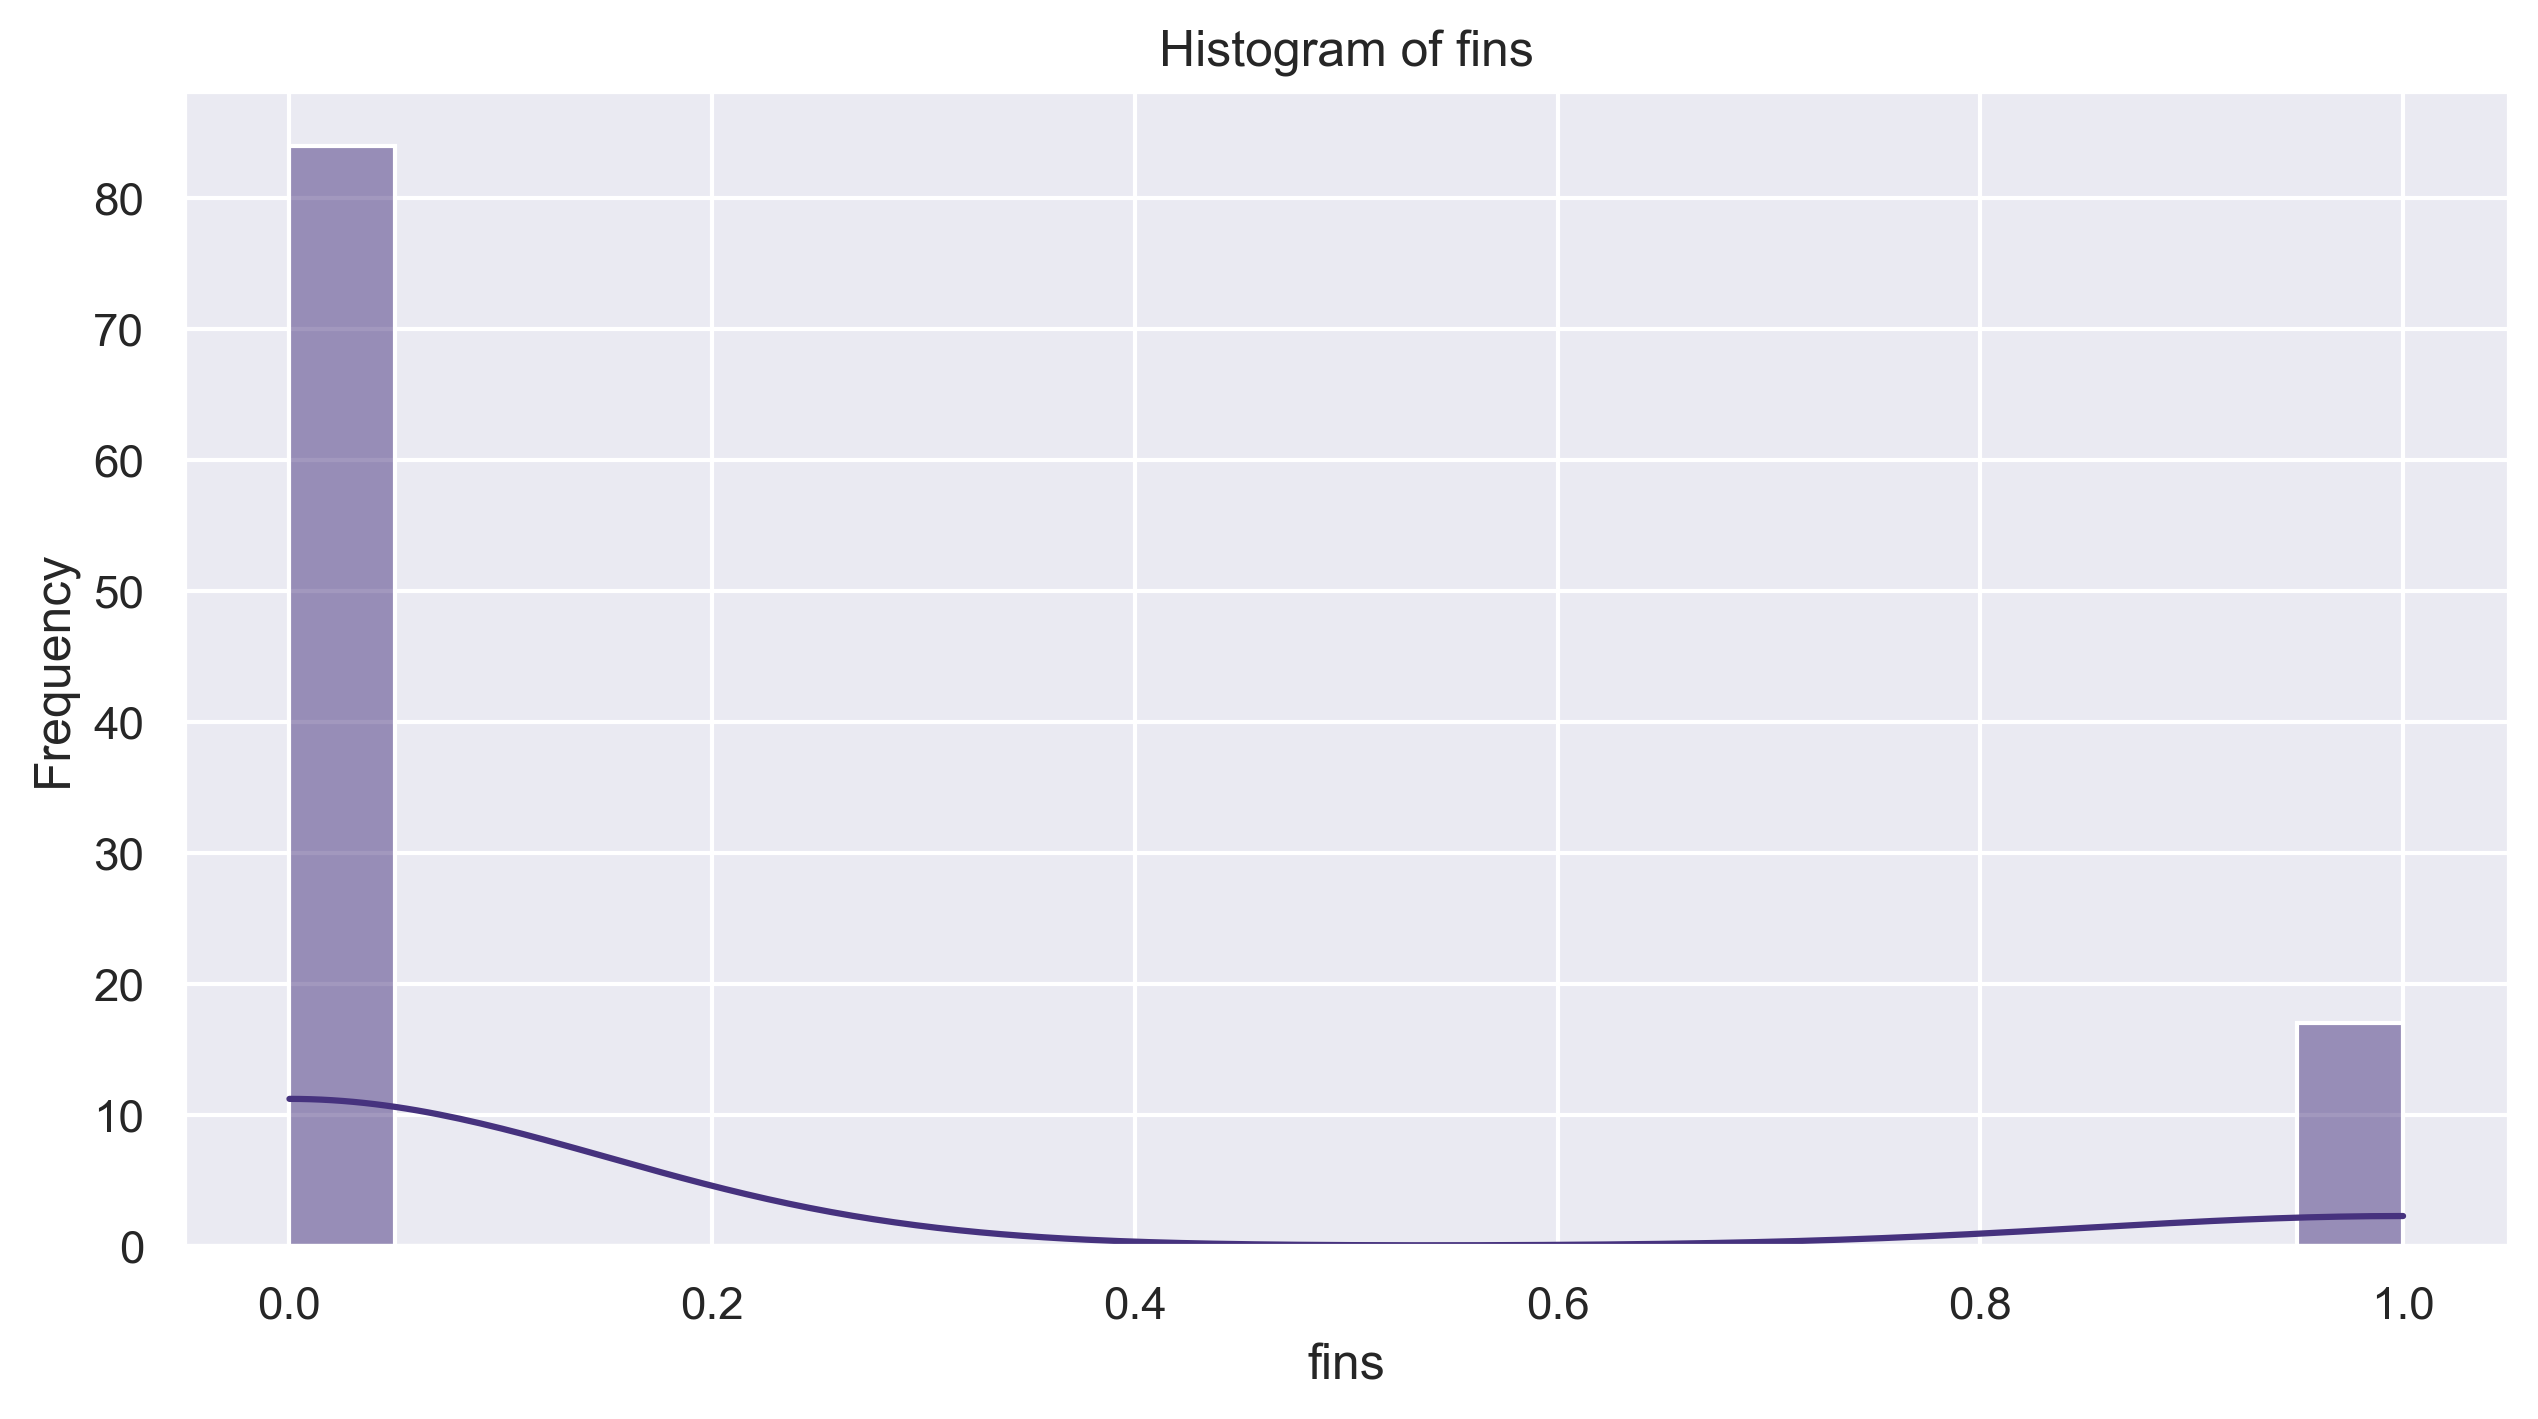

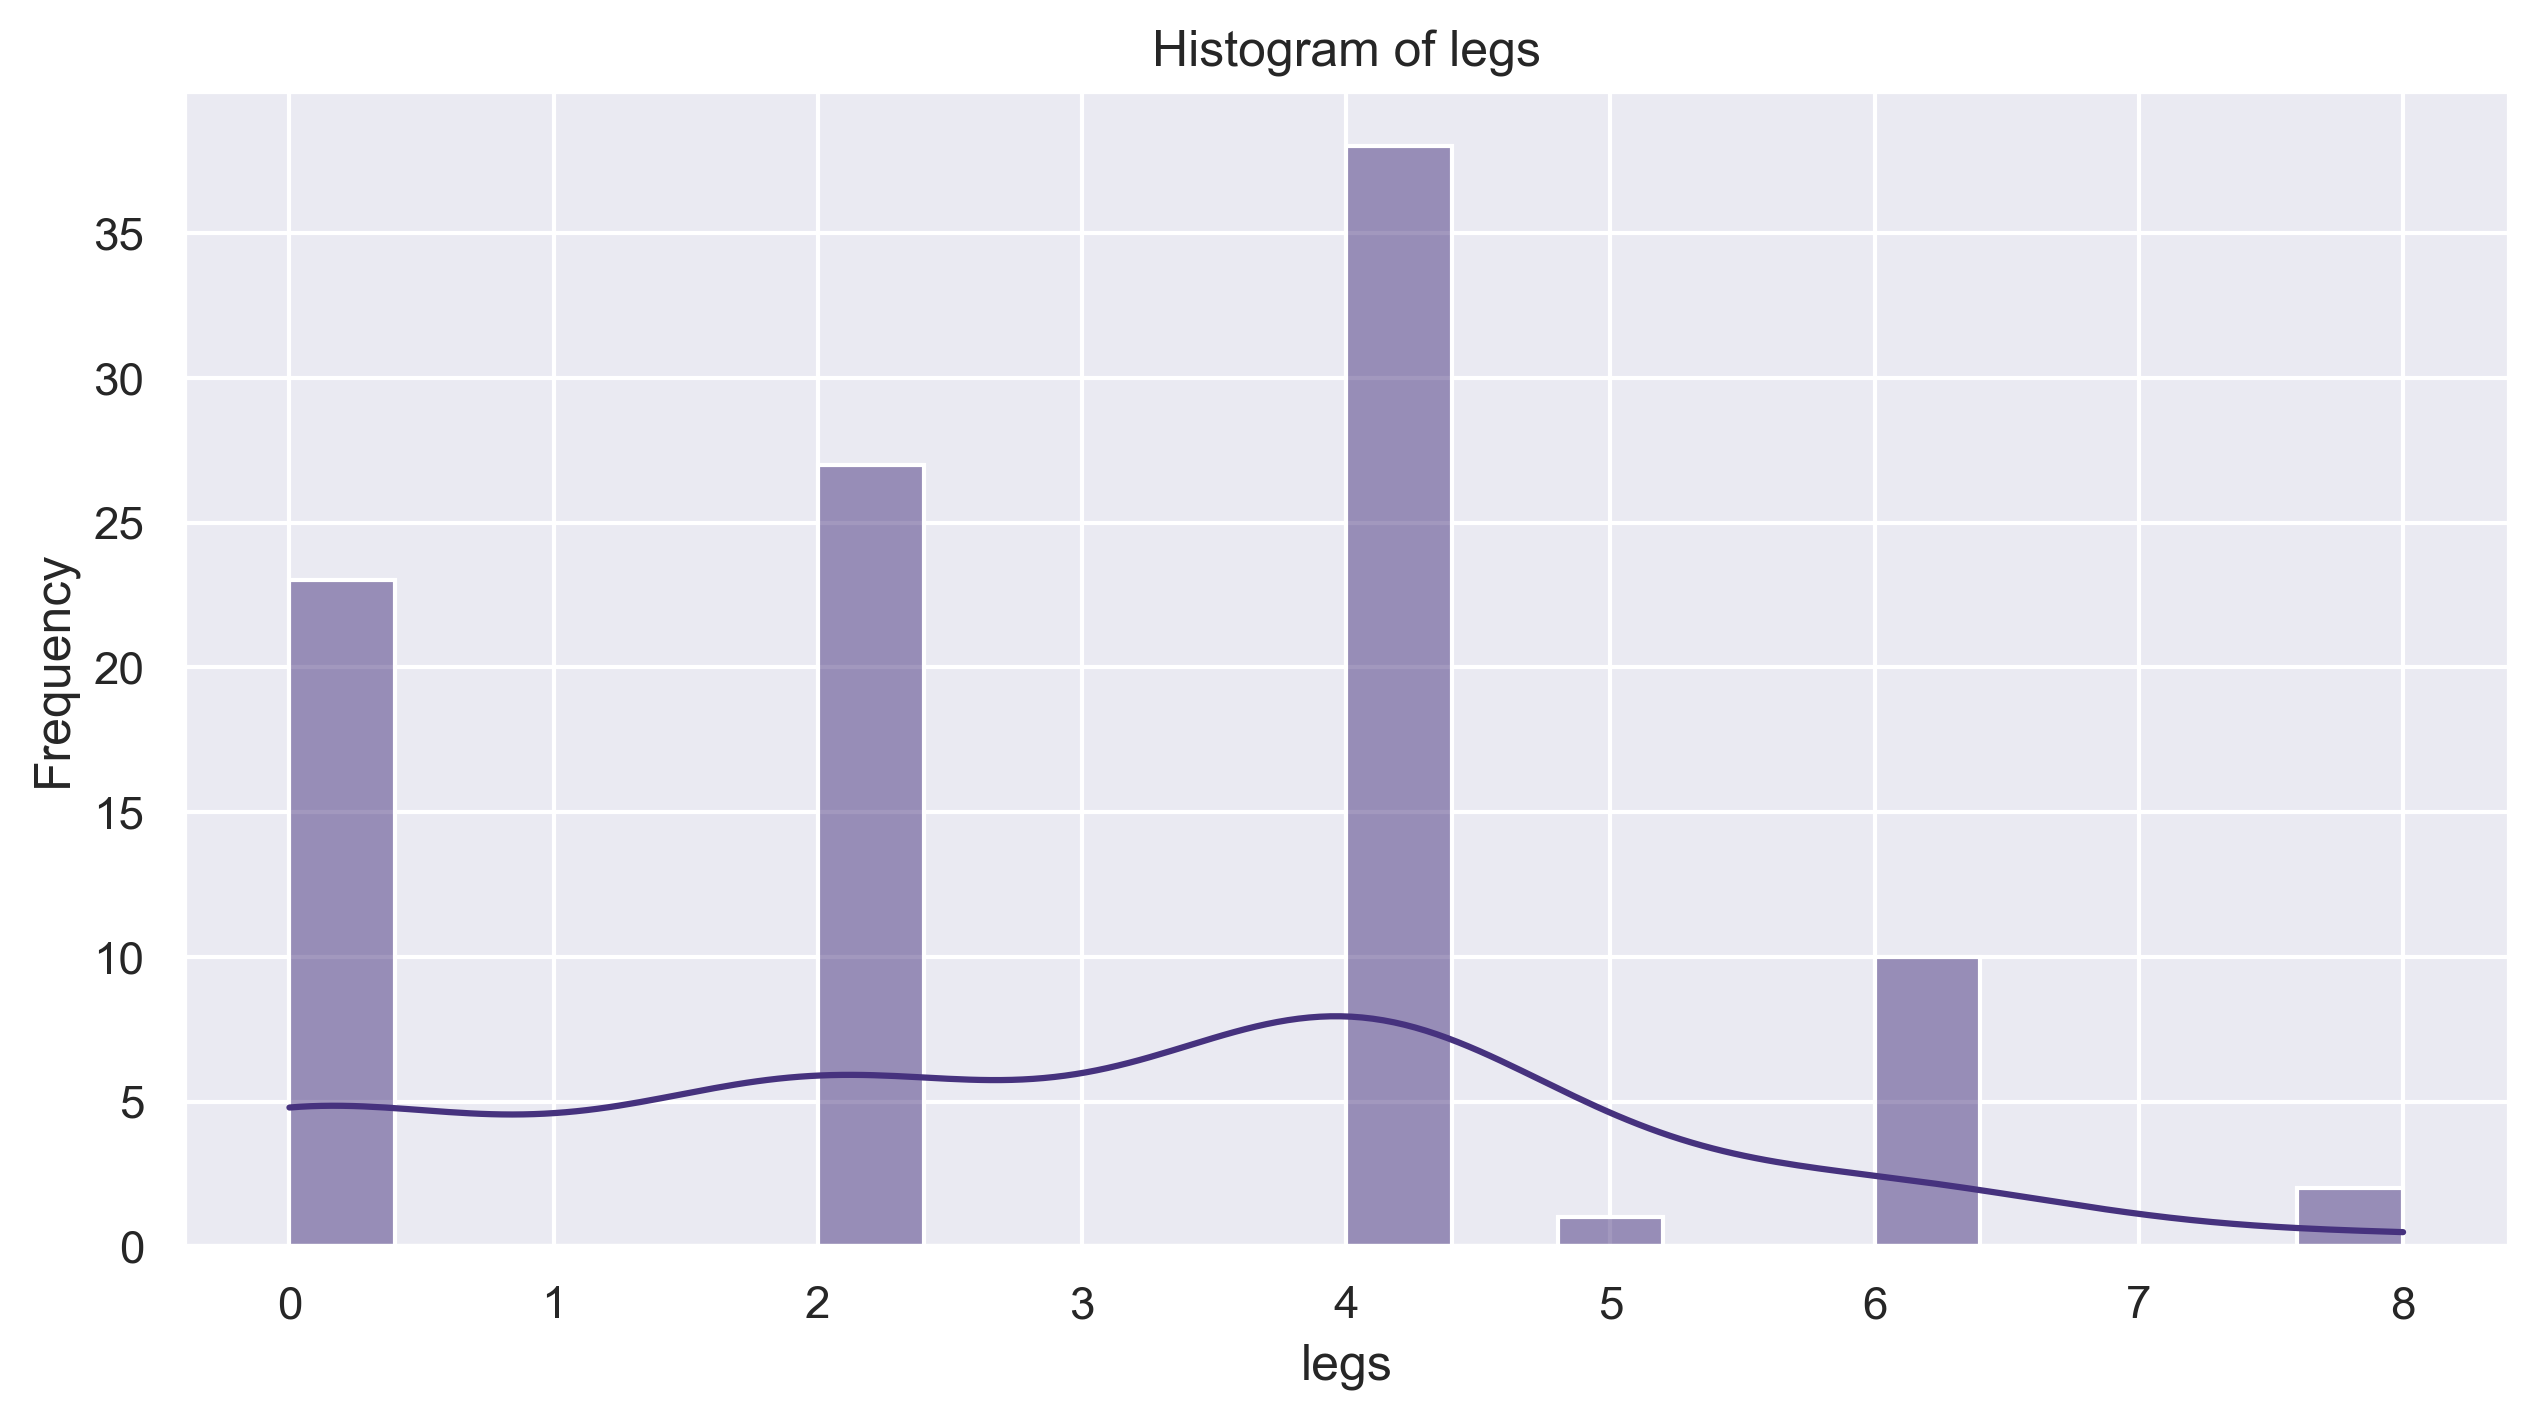

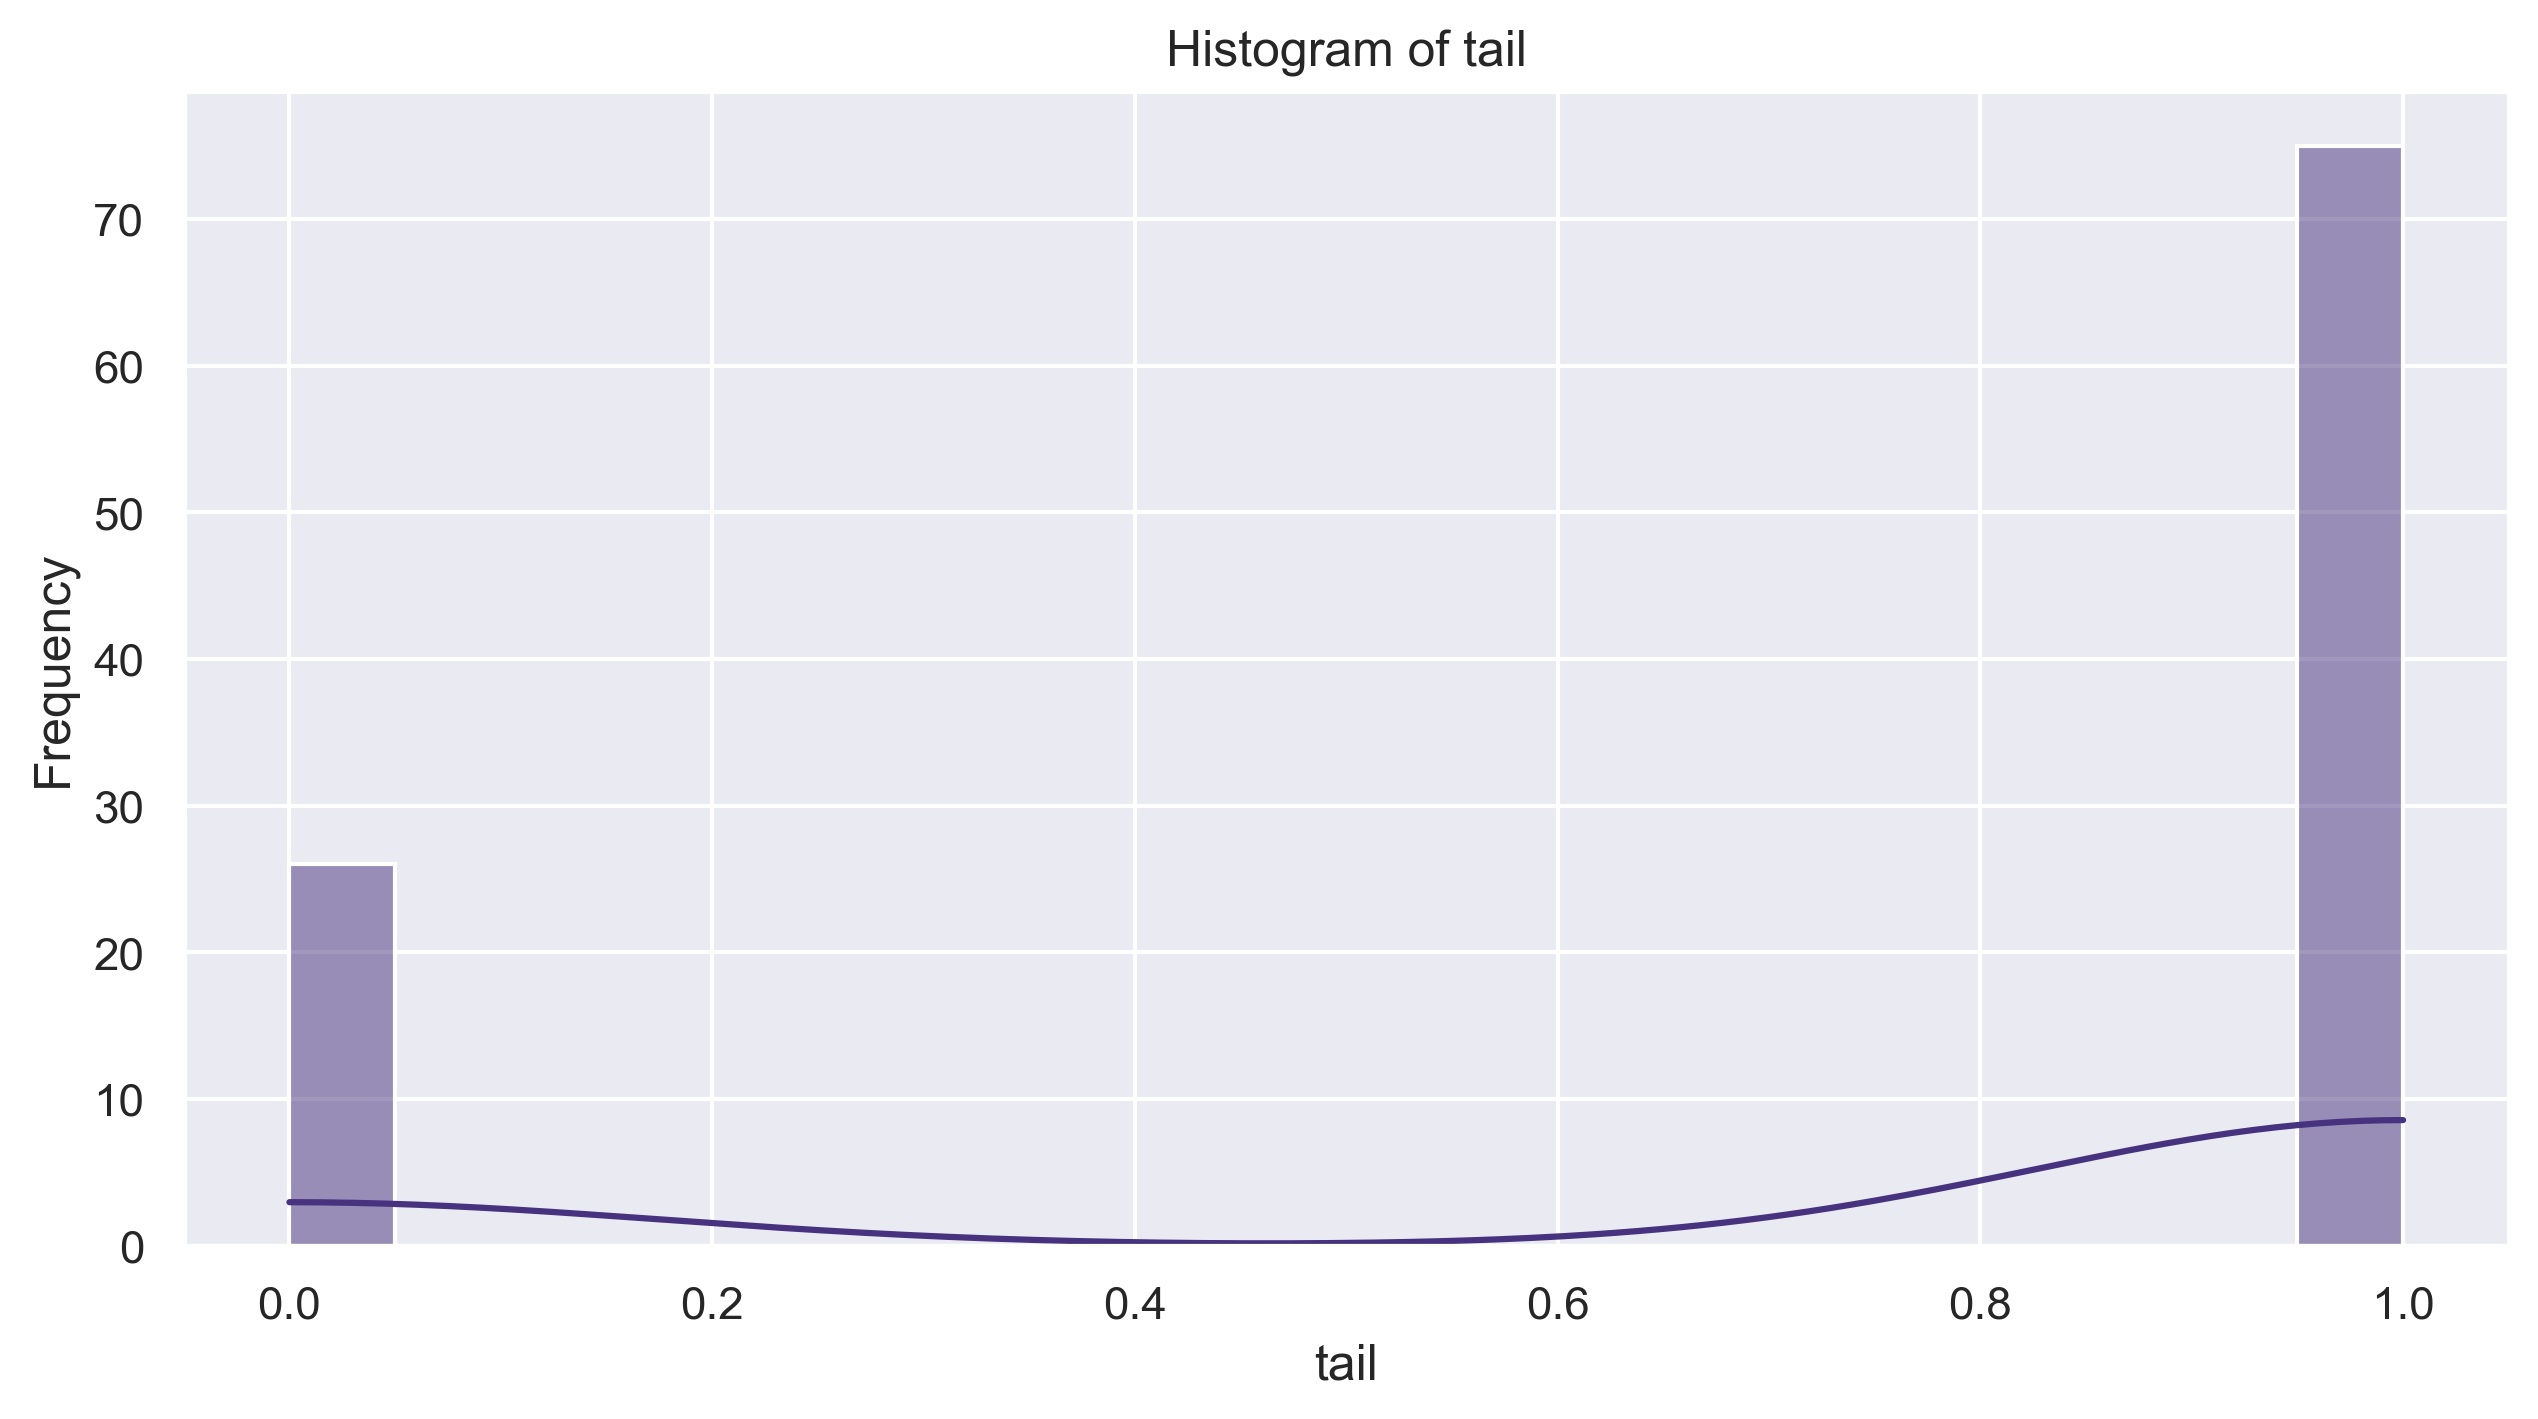

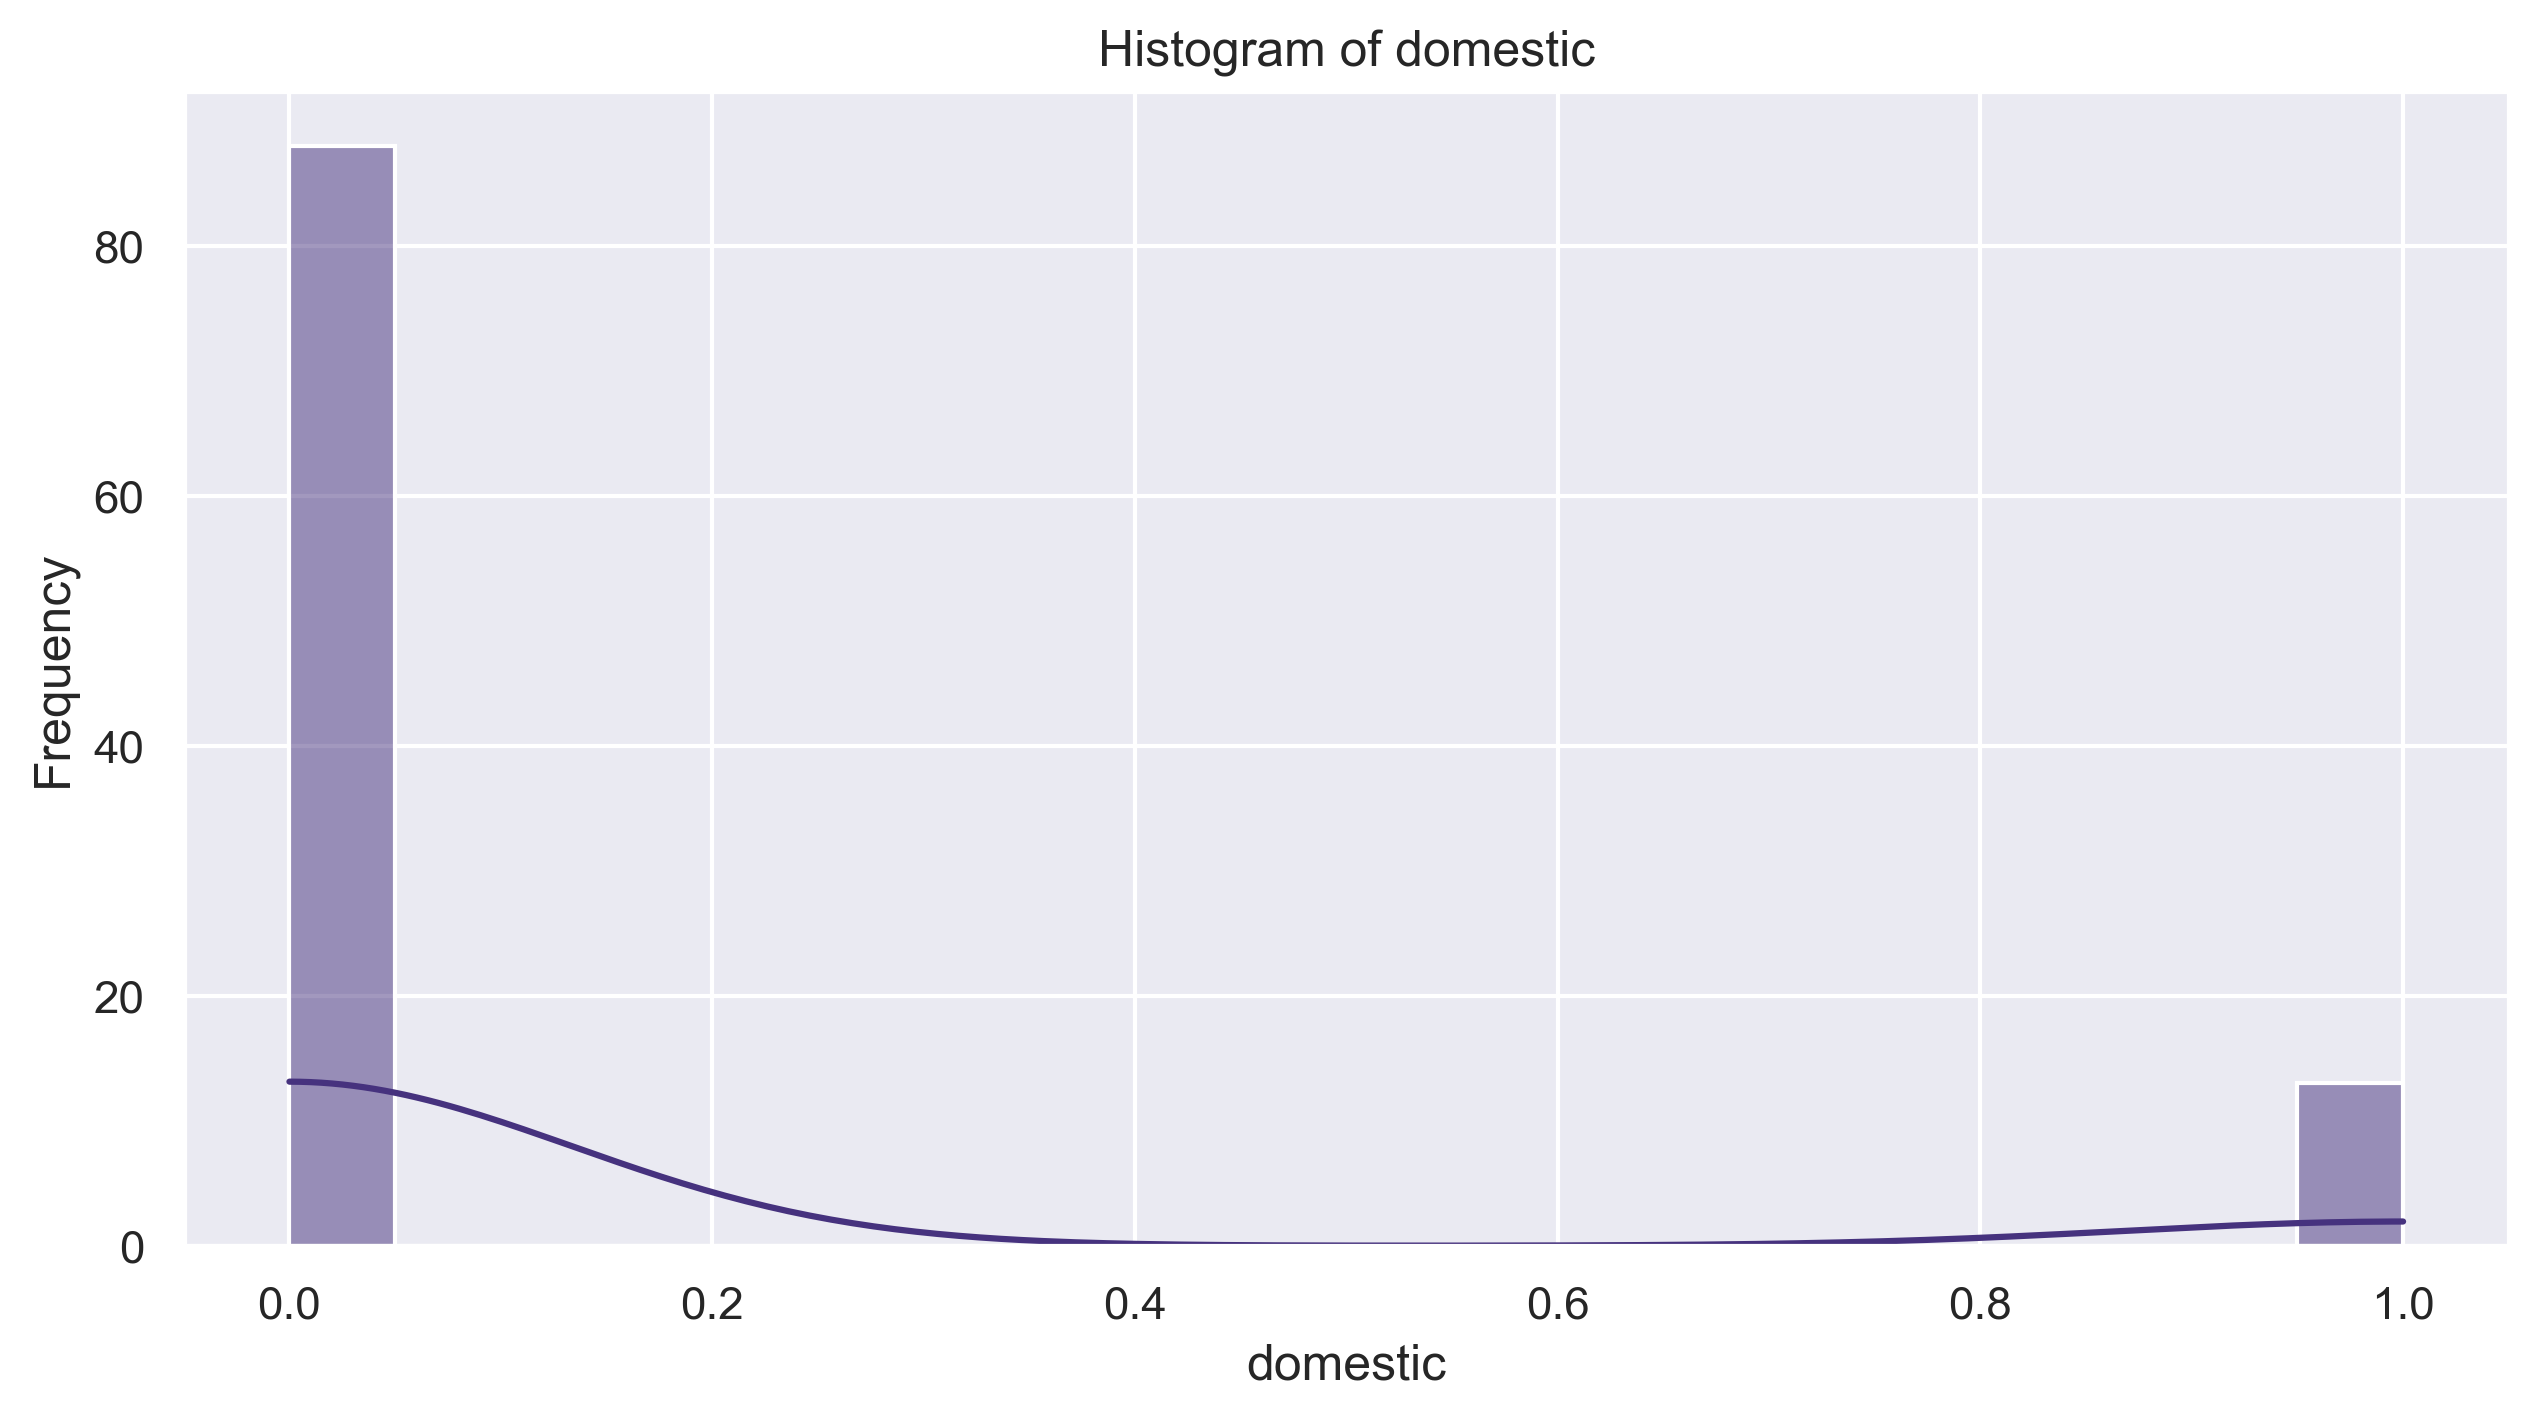

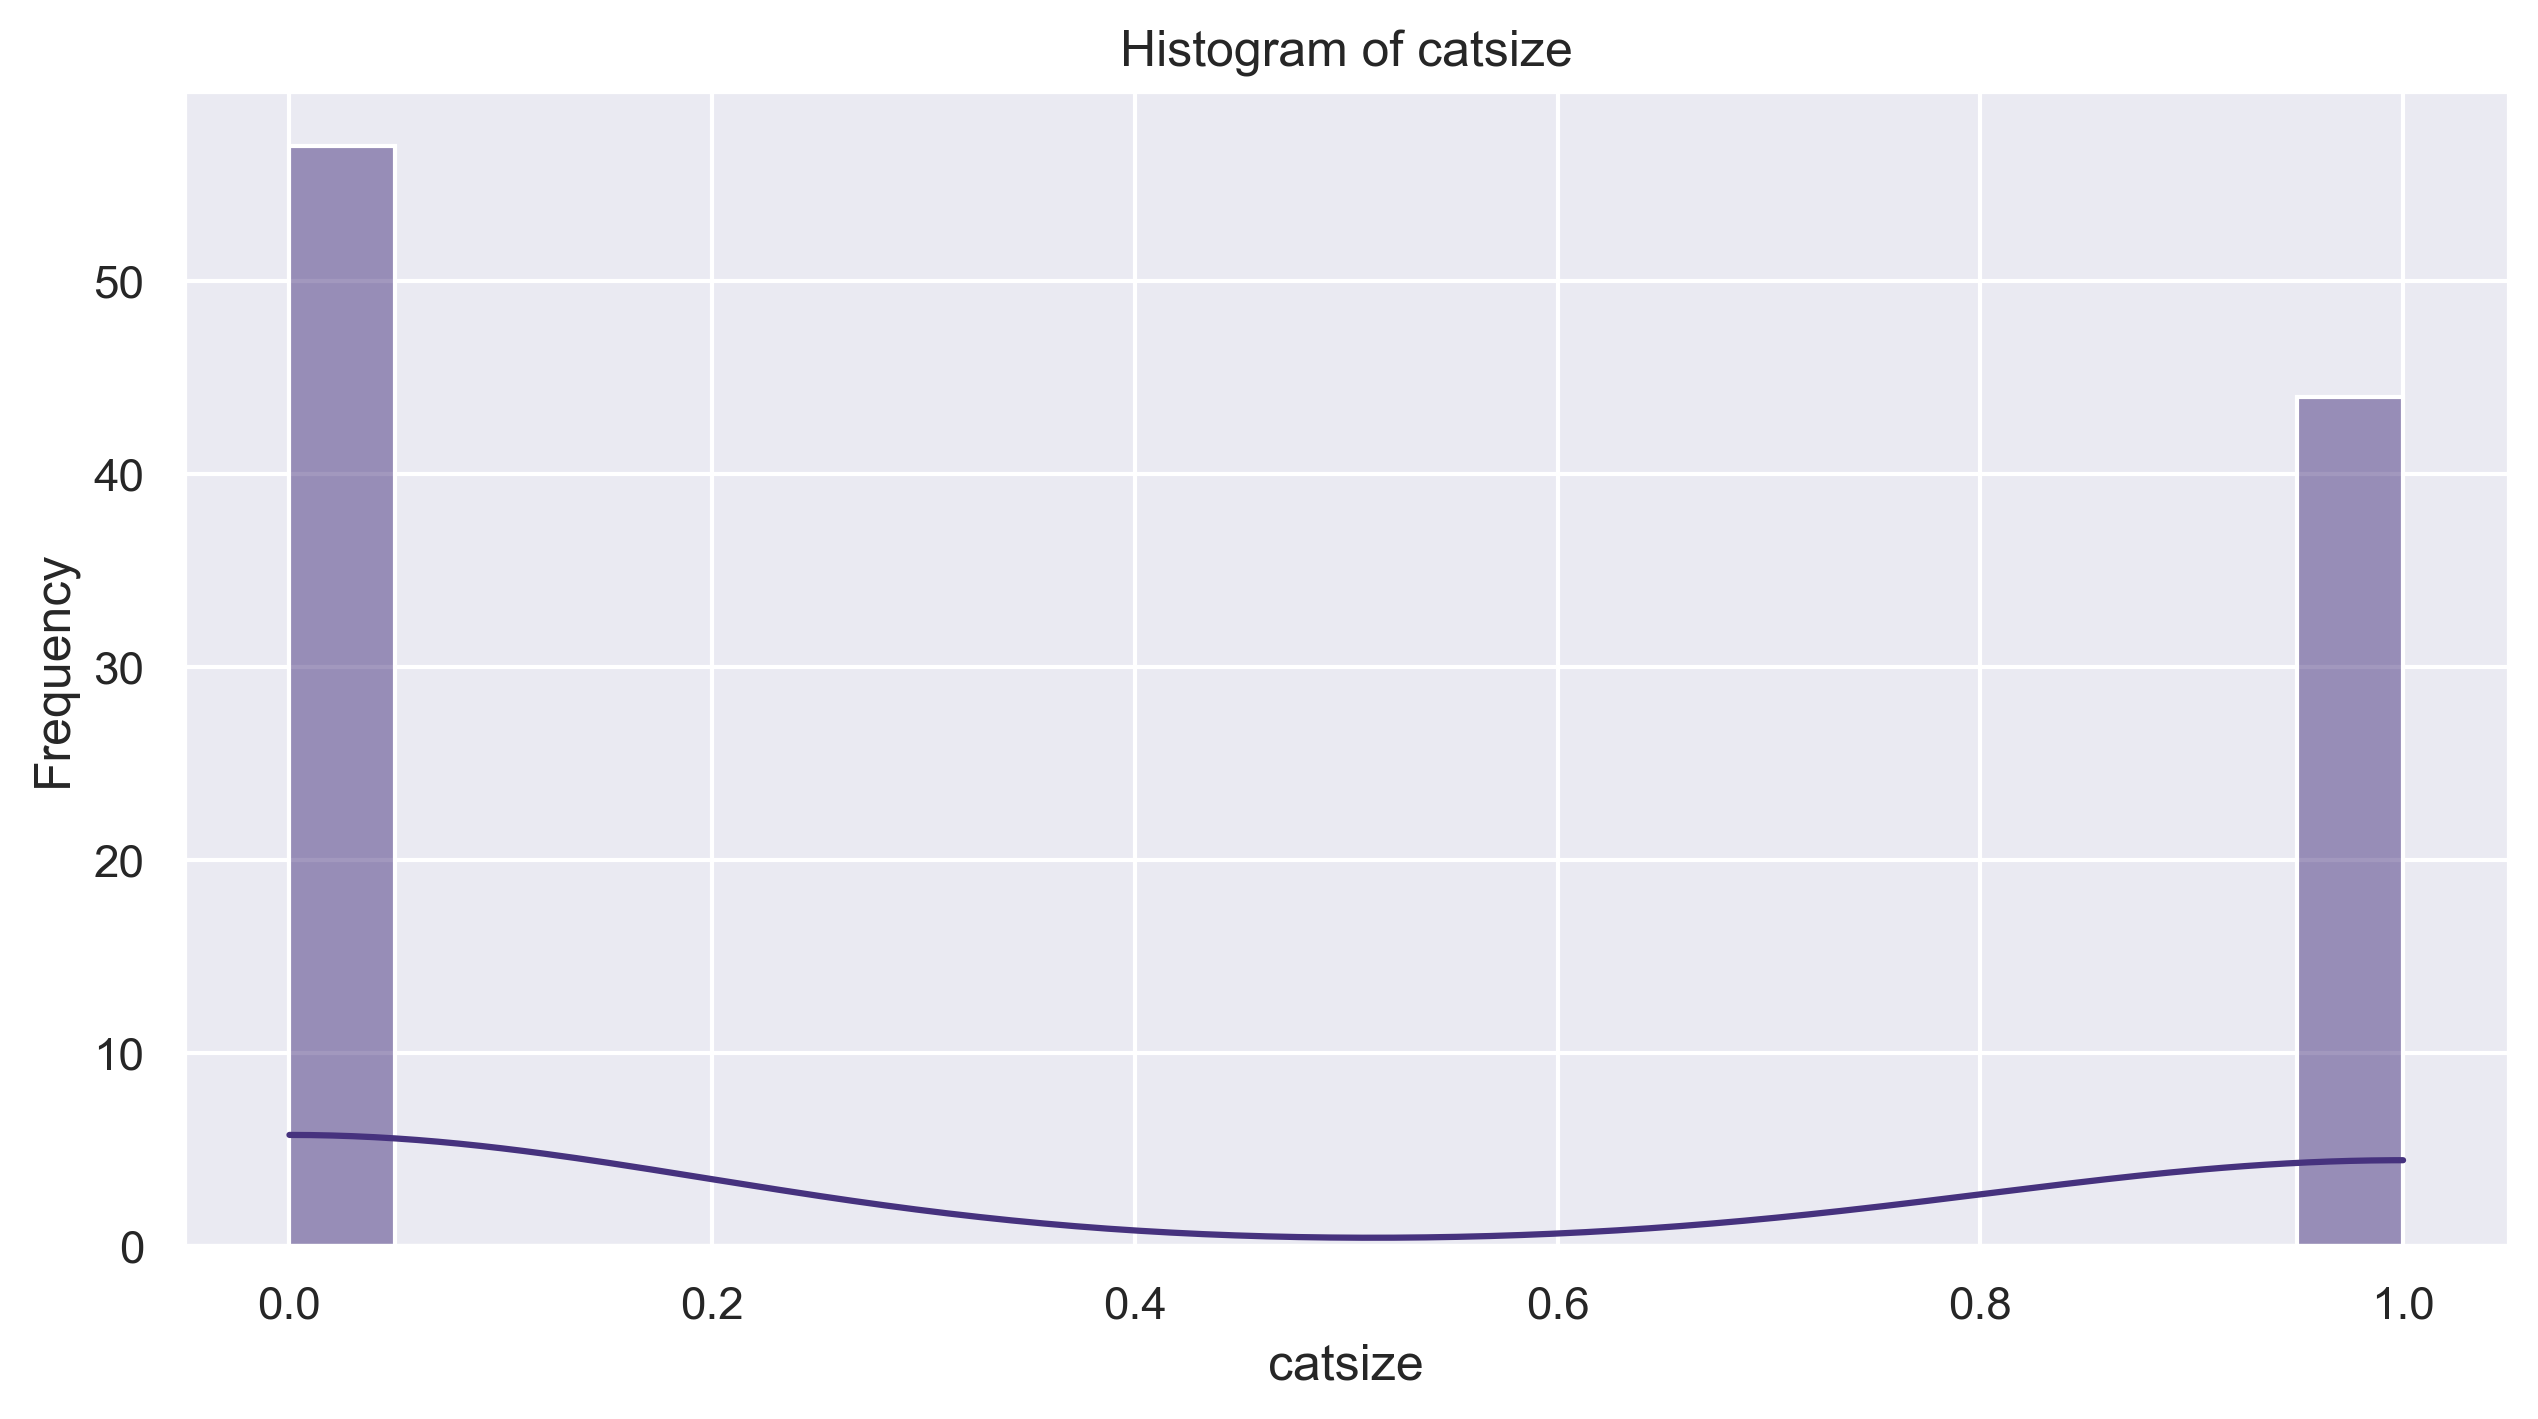

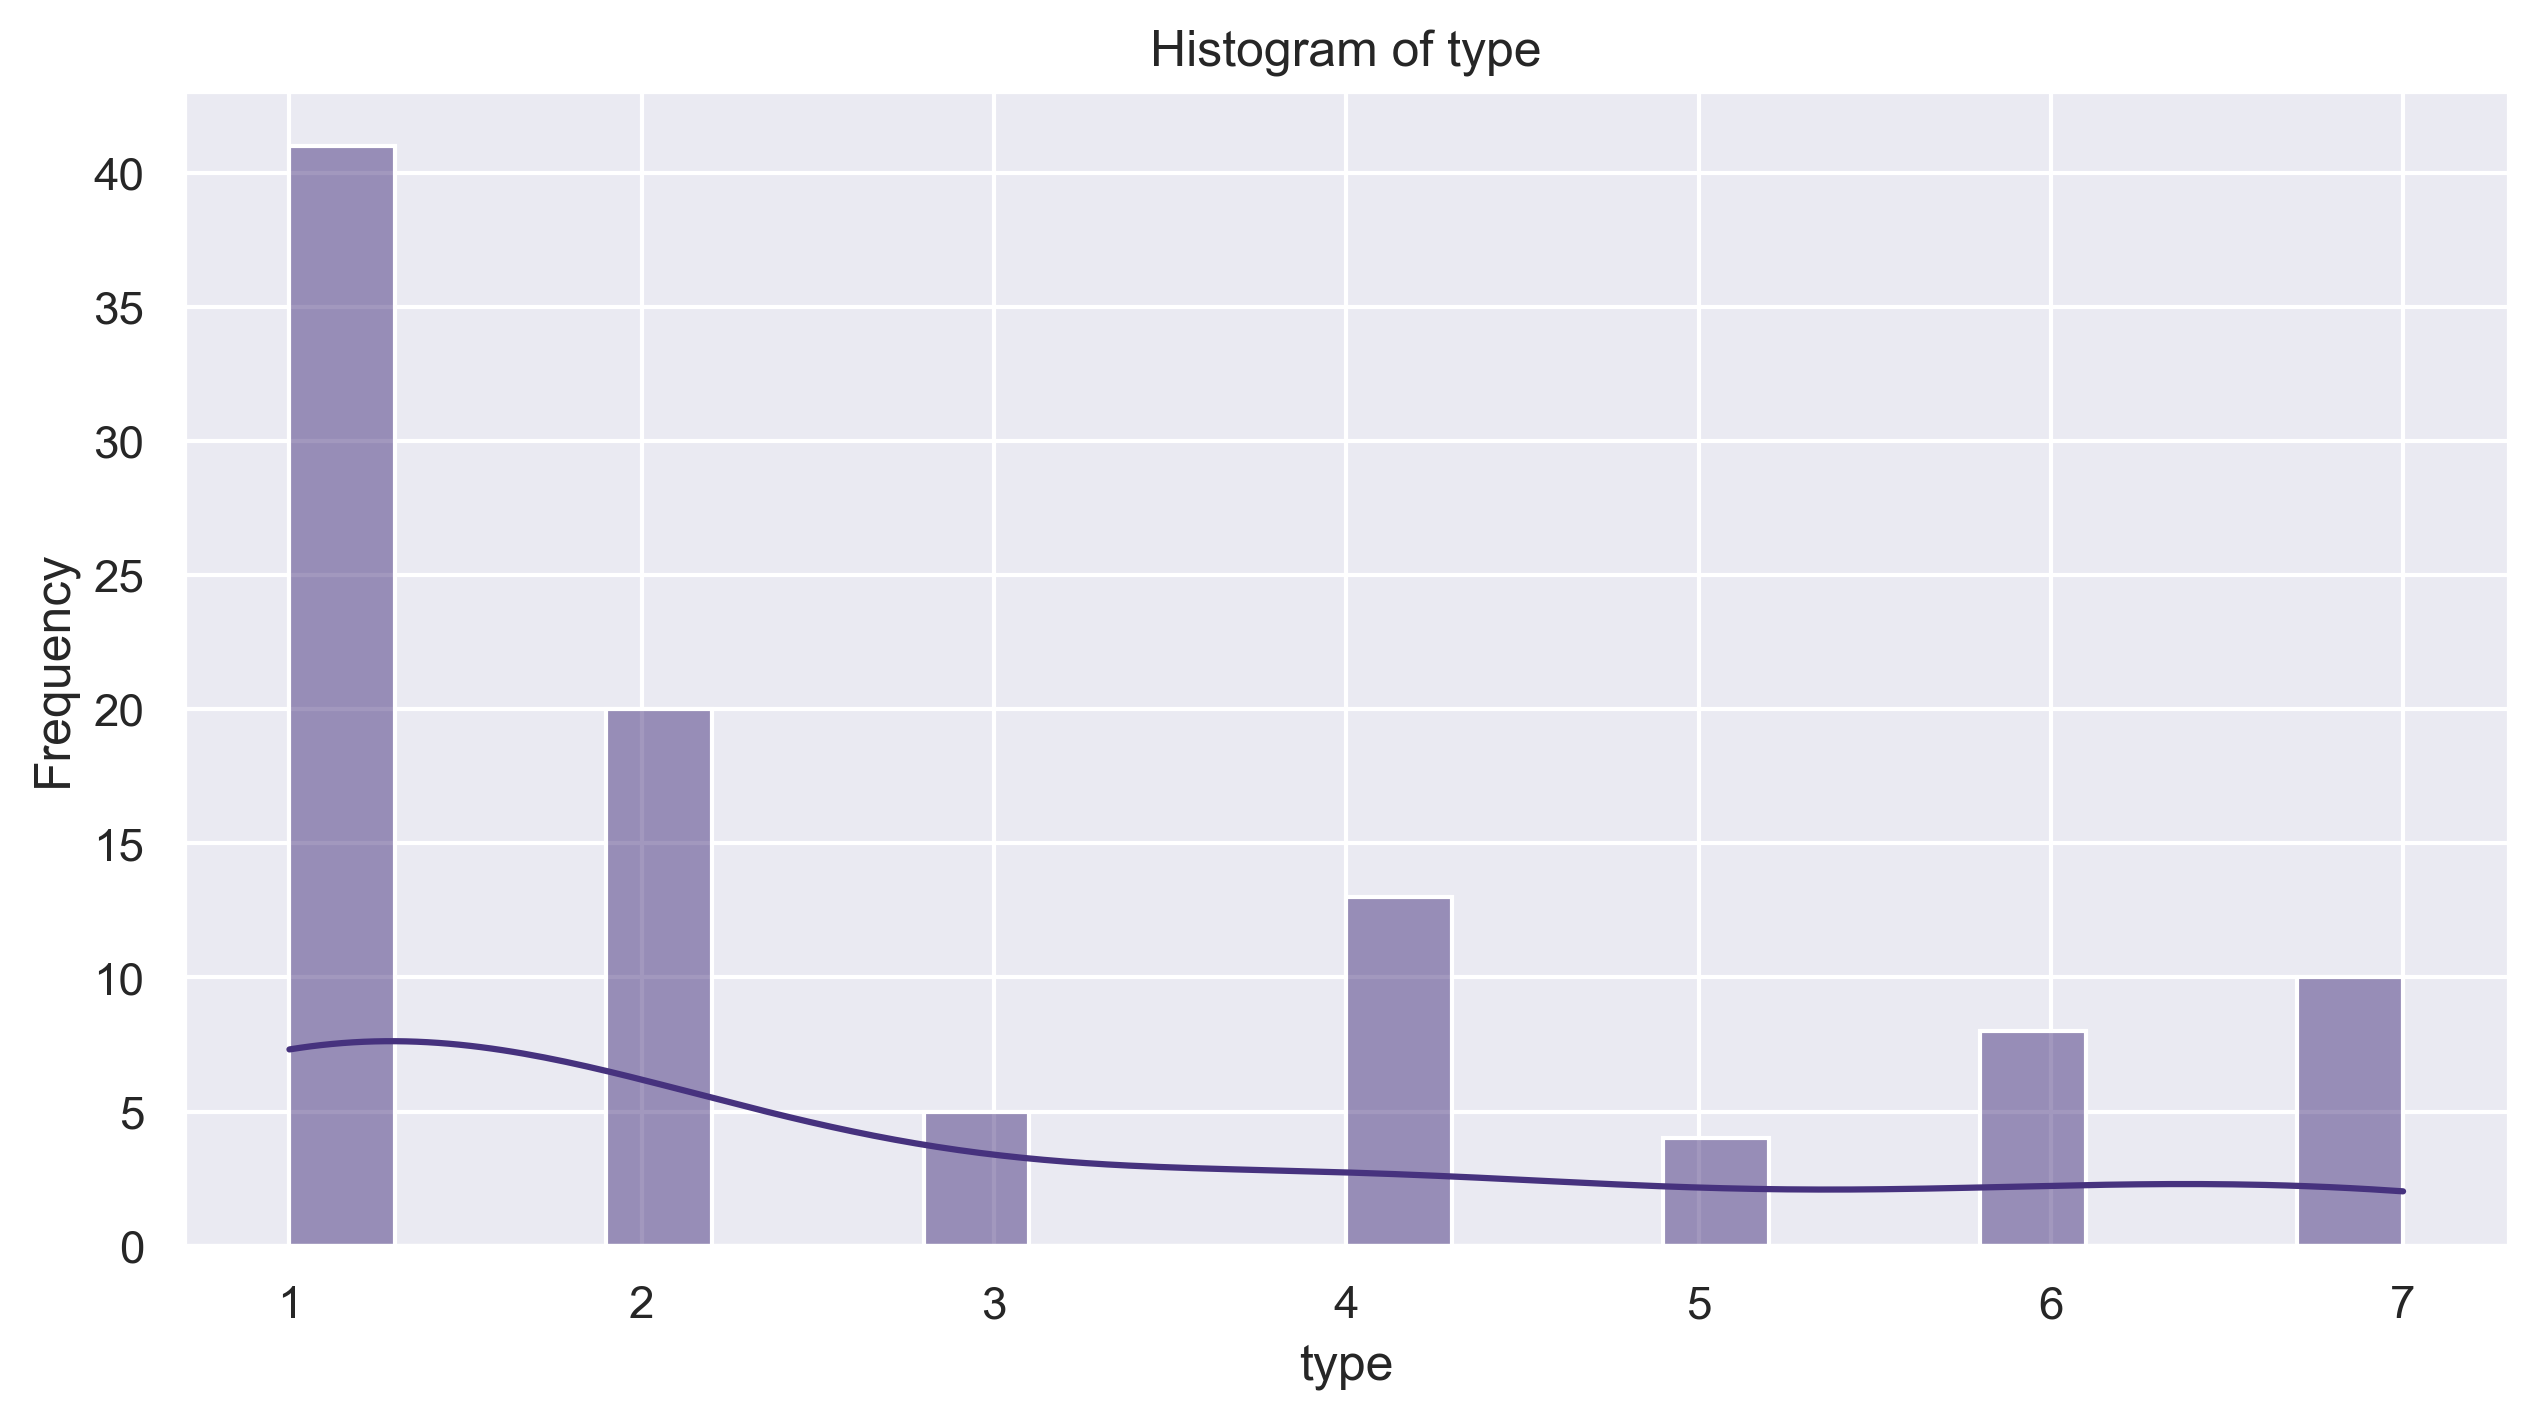

In [8]:
# To check the distribution of data 
# Iterate over DataFrame columns
for i, col in enumerate(df.columns):
    plt.subplots()  # +1 to start subplot indexing from 1
    sns.histplot(data=df, x=col, kde=True, bins=20)  # Use the column name for x
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

In [47]:
x= df.iloc[:,:-1]
y= df['type'].values

In [48]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [49]:
y,x.shape

(array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
        1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
        1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
        6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64),
 (101, 16))

# Diving the data for training and testing purpose 

In [52]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,random_state=23)

In [53]:
Xtrain,Xtest,Ytrain,Ytest 

(array([[ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
          2.60177454,  1.13818037],
        [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
          2.60177454,  1.13818037],
        [ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
          2.60177454,  1.13818037],
        ...,
        [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
         -0.38435306, -0.87859537],
        [ 1.16139451, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
         -0.38435306, -0.87859537]]),
 array([[ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
         -0.74420841, -1.1155467 ,  0.80977633,  0.46569032,  0.51234754,
         -0.29329423, -0.44986771,  0.57253971,  0.58878406, -0.38435306,
          1.13818037],
        [ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
         -0.74420841, -1.1155467 ,  0.80977633,  0.465

# Model building with Hyper Parameter Tunning

In [66]:
train_acc = []
test_acc = []

for i in range(10,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,Ytrain)
    train_acc.append(knn.score(Xtrain,Ytrain))
    test_acc.append(knn.score(Xtest,Ytest))

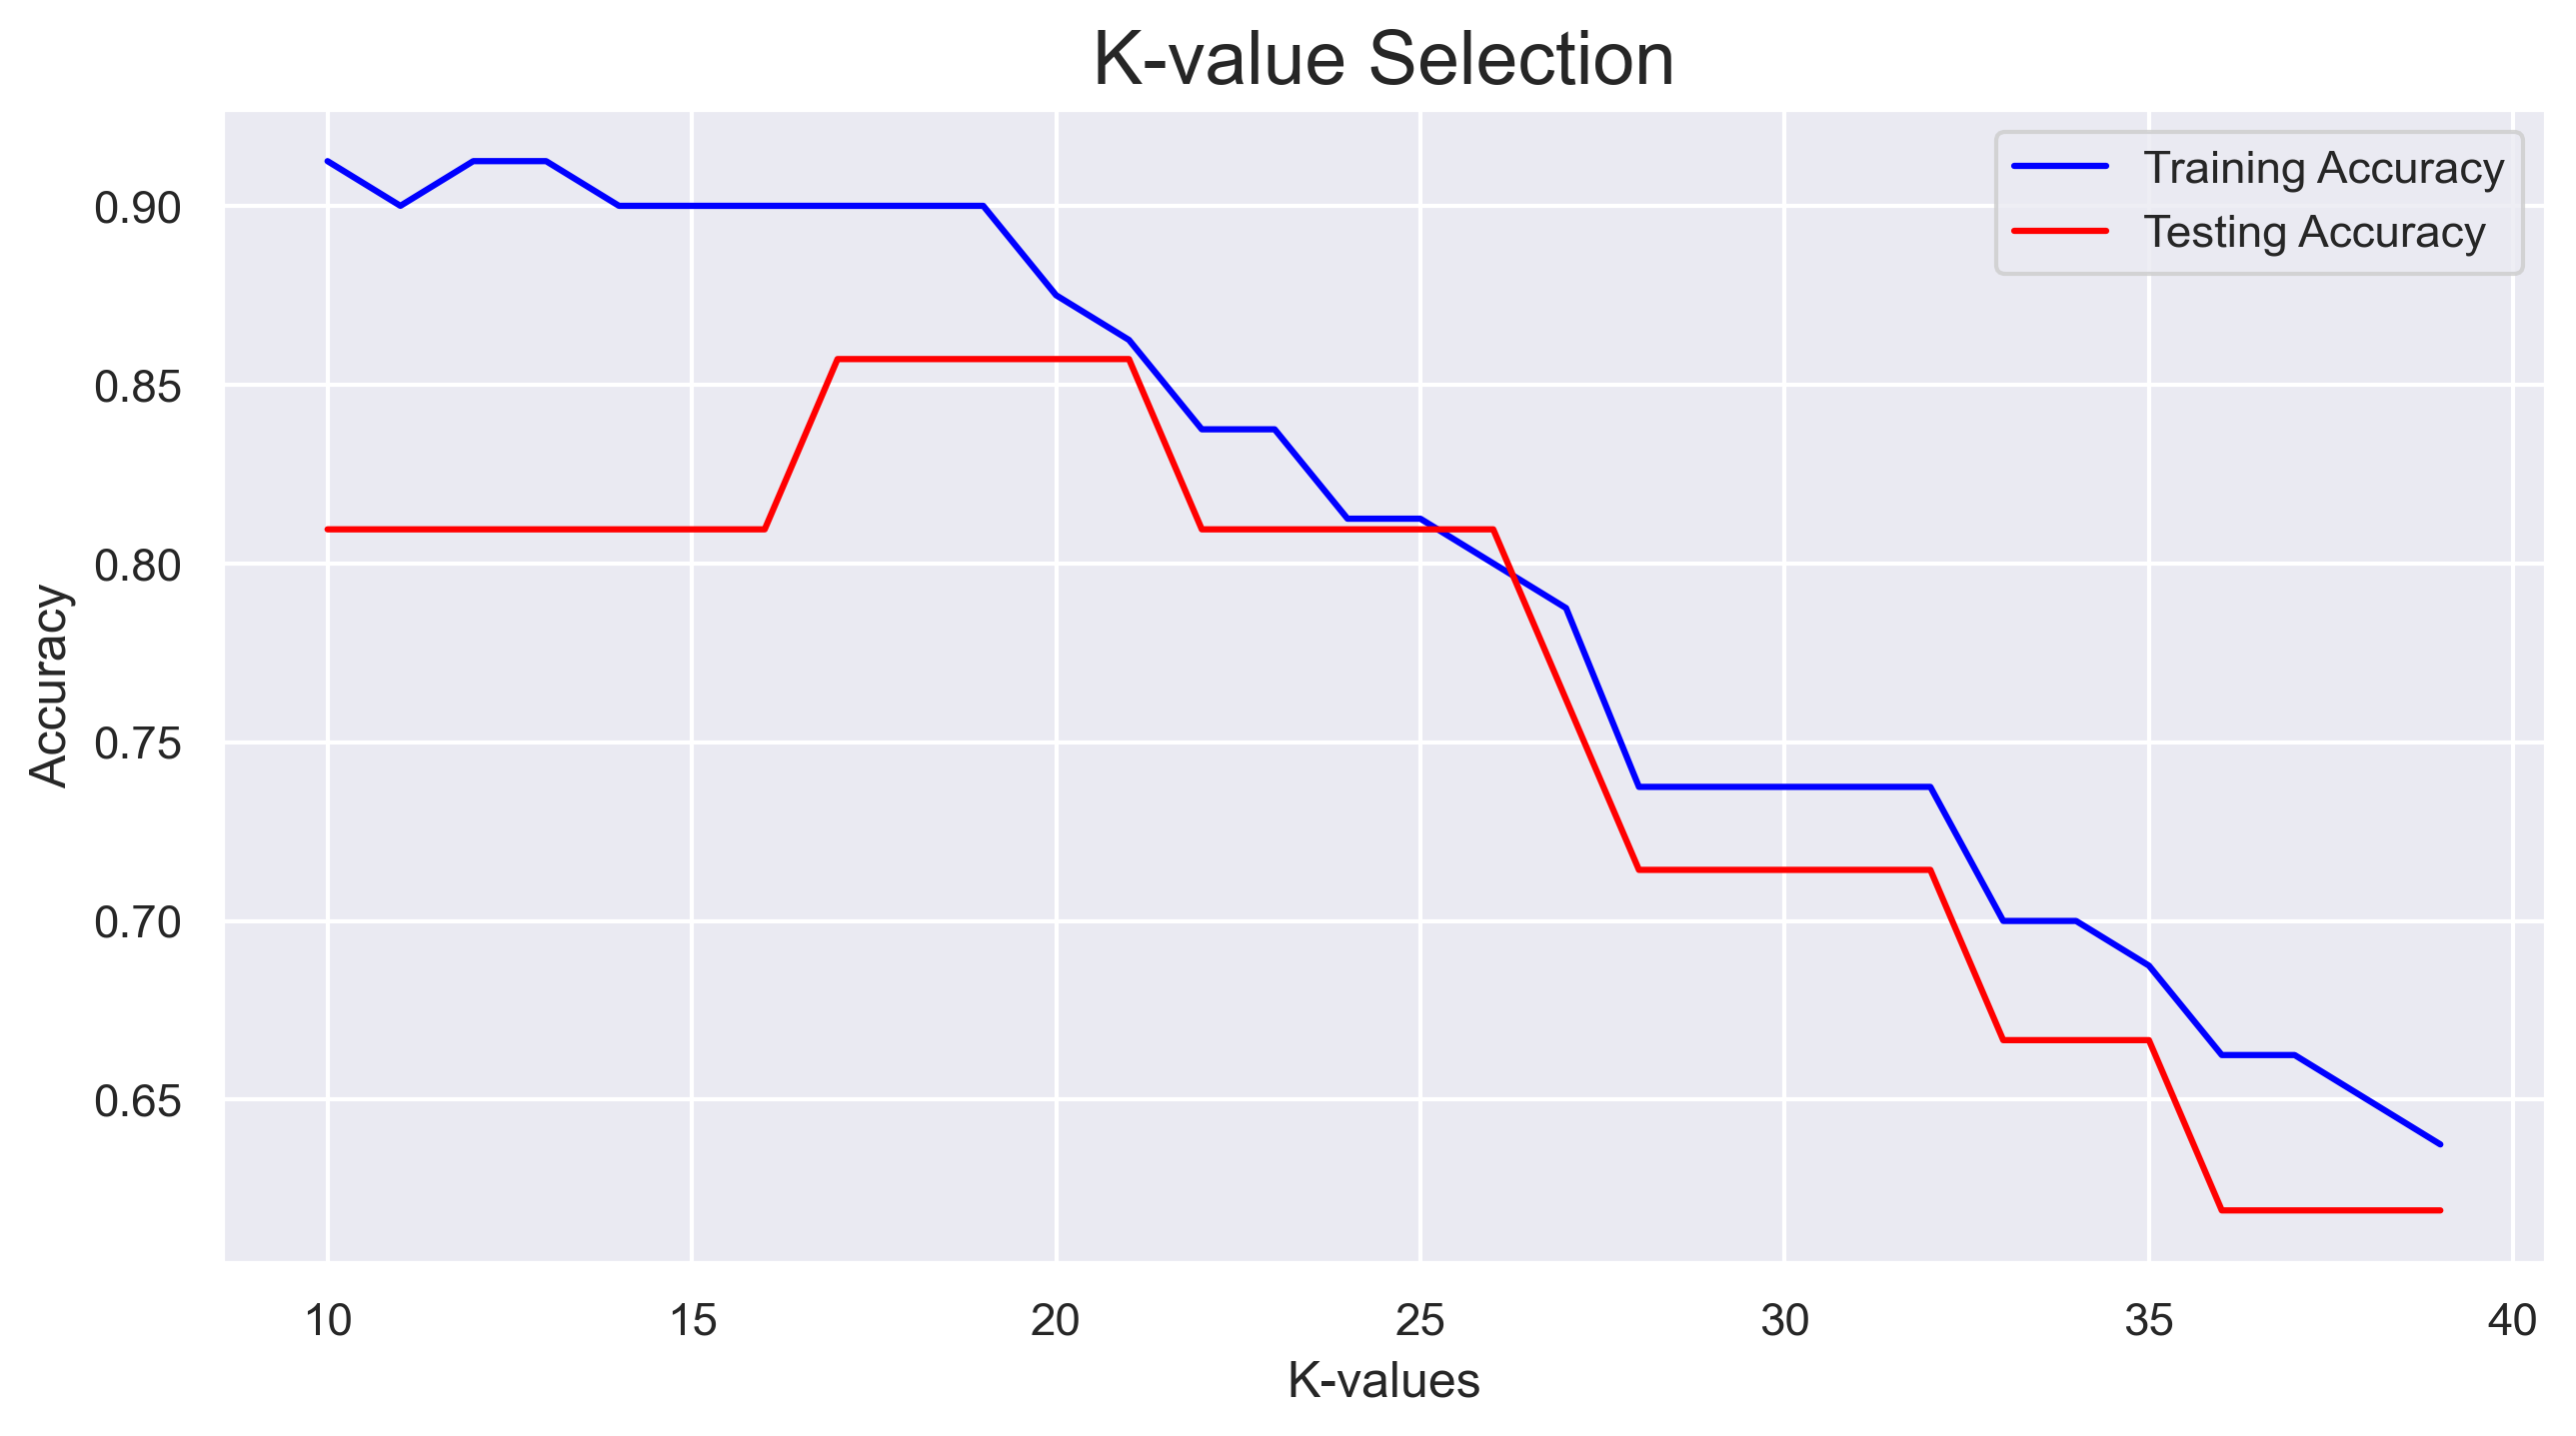

In [71]:
plt.plot(range(10,40), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(10,40), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size =18)
plt.legend()

In [69]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(Xtrain,Ytrain)
print(f'Traing Accuracy: {knn.score(Xtrain,Ytrain)}')
print(f'Testing Accuracy : {knn.score(Xtest,Ytest)}')

Traing Accuracy: 0.8625
Testing Accuracy : 0.8571428571428571
